In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import behaviour_functions as bhv
import statsmodels.api as sm
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests
# import statsmodels.formula.api as smf
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
path = '/Volumes/lab-kohlj/home/shared/people/Irene/Chemoinhibitions/scored/MeA/'
IDs = ['BRAC9595.2c', 'BRAC9284.3f', 'BRAC9284.3e', 'BRAC10307.5e', 'BRAC10520.3d', 
       'BRAC10466.3f', 'BRAC10307.5d',
       'BRAC9562.6c', 'BRAC9788.3c', 'BRAC9843.3h'] # experimental group
IDs_ctrl = ['BRAC9562.6d', 'BRAC9788.3d', 'BRAC9562.6g', 'BRAC10364.3a', 
            'BRAC10410.3f', 'BRAC10410.3h', 'BRAC9911.7d',] # control group
times = ['baselinepre', 'baselinepost', 'day1', 'day2', 'day3', 'day4']

In [3]:
# initialize dataframe for experimental group
behaviours = pd.DataFrame(columns = ["ID", "group", "time", "behaviour", "latency", "duration"])

# combine all IDs into a dictionary with their respective groups
group_mapping = {ID: "experimental" for ID in IDs}
group_mapping.update({ID: "control" for ID in IDs_ctrl})

# extract behaviours for each ID and each experimental time point
for ID, group in group_mapping.items():
    for time in times:
        try:
            # get the paths for each file in dataset, read csv files into a dataframe
            file = glob(path + f'{ID}_virgin_{time}_mea*.csv')
            # print(file)
            if file:
                print(f"Processing file: {file[0]}")  # Debug line to identify current file
                df = pd.read_csv(file[0])
                
                # Check if "pup intro" exists in this file
                if "Behavior" in df.columns and "pup intro" not in df.Behavior.values:
                    print(f"WARNING: No 'pup intro' found in file: {file[0]}")
            else:
                print(f'No file found: {ID}_virgin_{time}_mea*.csv')
                continue       
            
        except IndexError:
            df = pd.DataFrame(columns = df.columns)
            print(f'{ID}_virgin_{time}_mea*.csv')
            continue

        
        # organise behavioural data and calculate latency and duration of behaviours
        behaviours = bhv.organise_behav_new(df, ID, time, behaviours, 'time')

        # add group information for the current ID
        behaviours.loc[behaviours["ID"] == ID, "group"] = group


# turn values in time to categorical and order them
behaviours.time = pd.Categorical(behaviours.time, categories = times, ordered = True)

# save behaviour dataframe as csv",
behaviours.to_csv('/Users/irenesalgarella/Library/Mobile Documents/com~apple~CloudDocs/Documents/Documents - XJK222YYCT/GitHub/sensitization_behaviour/generated_dataset/mea_telc_behaviours_df.csv')

Processing file: /Volumes/lab-kohlj/home/shared/people/Irene/Chemoinhibitions/scored/MeA/BRAC9595.2c_virgin_baselinepre_mea_scored.csv
Processing file: /Volumes/lab-kohlj/home/shared/people/Irene/Chemoinhibitions/scored/MeA/BRAC9595.2c_virgin_baselinepost_mea_scored.csv
Processing file: /Volumes/lab-kohlj/home/shared/people/Irene/Chemoinhibitions/scored/MeA/BRAC9595.2c_virgin_day1_mea_scored.csv
Processing file: /Volumes/lab-kohlj/home/shared/people/Irene/Chemoinhibitions/scored/MeA/BRAC9595.2c_virgin_day2_mea_scored.csv
Processing file: /Volumes/lab-kohlj/home/shared/people/Irene/Chemoinhibitions/scored/MeA/BRAC9595.2c_virgin_day3_mea_scored.csv
Processing file: /Volumes/lab-kohlj/home/shared/people/Irene/Chemoinhibitions/scored/MeA/BRAC9595.2c_virgin_day4_mea_scored.csv
Processing file: /Volumes/lab-kohlj/home/shared/people/Irene/Chemoinhibitions/scored/MeA/BRAC9284.3f_virgin_baselinepre_mea_scored.csv
Processing file: /Volumes/lab-kohlj/home/shared/people/Irene/Chemoinhibitions/scor

In [4]:
# get the unique IDs for each group and print them
unique_IDs = behaviours.ID.unique()
print("Unique IDs in the experimental group:")
for ID in IDs:
    if ID in unique_IDs:
        print(ID)
    else:
        print(f"{ID} not found in the dataframe.")
print("\nUnique IDs in the control group:")
for ID in IDs_ctrl:
    if ID in unique_IDs:
        print(ID)
    else:
        print(f"{ID} not found in the dataframe.")

Unique IDs in the experimental group:
BRAC9595.2c
BRAC9284.3f
BRAC9284.3e
BRAC10307.5e
BRAC10520.3d
BRAC10466.3f
BRAC10307.5d
BRAC9562.6c
BRAC9788.3c
BRAC9843.3h

Unique IDs in the control group:
BRAC9562.6d
BRAC9788.3d
BRAC9562.6g
BRAC10364.3a
BRAC10410.3f
BRAC10410.3h
BRAC9911.7d


In [15]:
behaviours[behaviours.behaviour == 'overall retrieval']

ID         group          time          behaviour latency  \
5    BRAC9595.2c  experimental   baselinepre  overall retrieval     900   
13   BRAC9595.2c  experimental  baselinepost  overall retrieval    21.2   
21   BRAC9595.2c  experimental          day1  overall retrieval    9.95   
29   BRAC9595.2c  experimental          day2  overall retrieval   369.1   
37   BRAC9595.2c  experimental          day3  overall retrieval   30.55   
45   BRAC9595.2c  experimental          day4  overall retrieval   843.2   
53   BRAC9284.3f  experimental   baselinepre  overall retrieval     900   
61   BRAC9284.3f  experimental  baselinepost  overall retrieval     900   
69   BRAC9284.3f  experimental          day1  overall retrieval     900   
77   BRAC9284.3f  experimental          day2  overall retrieval     900   
85   BRAC9284.3f  experimental          day3  overall retrieval     900   
93   BRAC9284.3f  experimental          day4  overall retrieval     900   
101  BRAC9284.3e  experimental   baselinepre  overall retrieval     900   
109  BRAC9284.3e  experimental  baselinepost  overall retrieval     900   
117  BRAC9284.3e  experimental          day1  overall retrieval     900   
125  BRAC9284.3e  experimental          day2  overall retrieval     0.8   
133  BRAC9284.3e  experimental          day3  overall retrieval  715.65   
141  BRAC9284.3e  experimental          day4  overall retrieval    16.6   
149  BRAC9562.6d       control   baselinepre  overall retrieval     900   
157  BRAC9562.6d       control          day1  overall retrieval    34.8   
165  BRAC9562.6d       control          day2  overall retrieval    8.35   
173  BRAC9562.6d       control          day3  overall retrieval     7.1   
181  BRAC9562.6d       control          day4  overall retrieval   11.95   
189  BRAC9788.3d       control   baselinepre  overall retrieval     900   
197  BRAC9788.3d       control  baselinepost  overall retrieval     900   
205  BRAC9788.3d       control          day1  overall retrieval     900   
213  BRAC9788.3d       control          day2  overall retrieval   20.05   
221  BRAC9788.3d       control          day3  overall retrieval    5.75   
229  BRAC9788.3d       control          day4  overall retrieval    27.0   
237  BRAC9562.6g       control   baselinepre  overall retrieval     900   
245  BRAC9562.6g       control  baselinepost  overall retrieval     900   
253  BRAC9562.6g       control          day1  overall retrieval   22.05   
261  BRAC9562.6g       control          day2  overall retrieval     9.5   
269  BRAC9562.6g       control          day3  overall retrieval     8.2   
277  BRAC9562.6g       control          day4  overall retrieval     8.1   

    duration  
5          0  
13       2.5  
21       6.9  
29       7.6  
37     13.65  
45      3.65  
53         0  
61         0  
69         0  
77         0  
85         0  
93         0  
101        0  
109        0  
117        0  
125    14.85  
133    10.95  
141    13.75  
149        0  
157     8.65  
165      7.6  
173      7.2  
181      7.8  
189        0  
197        0  
205        0  
213      6.0  
221    11.35  
229     7.35  
237        0  
245        0  
253     5.25  
261     10.8  
269     12.8  
277      9.0

In [4]:
percentages = pd.DataFrame(columns=["time", "behaviour", "group", "percentage"])

for time in times:
    for behaviour in behaviours.behaviour.unique():
        per_df = behaviours[(behaviours.behaviour == behaviour) & (behaviours.time == time)]

        for group in per_df.group.unique():
            group_df = per_df[per_df.group == group]  # Filter by group
            num = group_df[group_df.duration == 0].shape[0]  # Animals that did not perform the behaviour
            if group_df.shape[0] > 0:
                percent = (group_df.shape[0] - num) / group_df.shape[0]  # Percentage of animals performing
            else:
                percent = None  # Handle cases where there are no animals in the group

            percentage = pd.DataFrame({
                "time": [time],
                "behaviour": [behaviour],
                "group": [group],
                "percentage": [percent]
            })
            
            percentages = pd.concat([percentages, percentage], ignore_index=True)            

In [5]:
# TWO-WAY FISHER'S EXACT TEST WITH FDR CORRECTION - RETRIEVAL TO NEST ONLY

# First, we need to create contingency tables of counts, not percentages
# We'll need to go back to the original behavior data

# Define the behavior of interest - modify this if the exact name is different
target_behavior = 'retrieval to nest'  

# Check if the target behavior exists in the dataset
if target_behavior not in behaviours.behaviour.unique():
    # Try to find a similar behavior if exact match doesn't exist
    retrieval_behaviors = [b for b in behaviours.behaviour.unique() if 'retrieval' in b.lower()]
    if retrieval_behaviors:
        target_behavior = retrieval_behaviors[0]  # Use the first retrieval behavior found
        print(f"Using '{target_behavior}' as the target behavior")
    else:
        print("No retrieval behavior found in the dataset")

fishers_results = pd.DataFrame(columns=[
    'time', 'exp_performing', 'exp_total', 'exp_percent',
    'ctrl_performing', 'ctrl_total', 'ctrl_percent', 'odds_ratio', 'p_value'
])

# Loop through each time point for the target behavior
for time in times:
    # Get data for this behavior and time
    behav_time_df = behaviours[(behaviours.behaviour == target_behavior) & (behaviours.time == time)]
    
    # Skip if either group is missing
    if len(behav_time_df['group'].unique()) < 2:
        continue
        
    # Calculate counts for experimental group
    exp_df = behav_time_df[behav_time_df.group == 'experimental']
    exp_total = len(exp_df)
    exp_performing = len(exp_df[exp_df.duration > 0])
    exp_not_performing = exp_total - exp_performing
    exp_percent = exp_performing / exp_total if exp_total > 0 else 0
    
    # Calculate counts for control group
    ctrl_df = behav_time_df[behav_time_df.group == 'control']  
    ctrl_total = len(ctrl_df)
    ctrl_performing = len(ctrl_df[ctrl_df.duration > 0])
    ctrl_not_performing = ctrl_total - ctrl_performing
    ctrl_percent = ctrl_performing / ctrl_total if ctrl_total > 0 else 0
    
    # Create contingency table
    # [performing, not performing]
    # [experimental, control]
    contingency_table = [
        [exp_performing, exp_not_performing],
        [ctrl_performing, ctrl_not_performing]
    ]
    
    # Perform Fisher's exact test
    try:
        odds_ratio, p_value = fisher_exact(contingency_table)
        
        # Append results
        fishers_results = pd.concat([fishers_results, pd.DataFrame({
            'time': [time],
            'exp_performing': [exp_performing],
            'exp_total': [exp_total],
            'exp_percent': [exp_percent],
            'ctrl_performing': [ctrl_performing], 
            'ctrl_total': [ctrl_total],
            'ctrl_percent': [ctrl_percent],
            'odds_ratio': [odds_ratio],
            'p_value': [p_value]
        })], ignore_index=True)
        
    except Exception as e:
        print(f"Error analyzing {target_behavior} at {time}: {e}")

# Apply multiple testing correction (FDR) if there are multiple time points
if len(fishers_results) > 1:
    _, corrected_pvals, _, _ = multipletests(
        fishers_results['p_value'], 
        method='fdr_bh'  # Benjamini-Hochberg FDR
    )
    fishers_results['adjusted_p_value'] = corrected_pvals
else:
    # If only one test was performed, no correction needed
    fishers_results['adjusted_p_value'] = fishers_results['p_value']

# Add significance indicators
fishers_results['significance'] = 'ns'
fishers_results.loc[fishers_results['adjusted_p_value'] < 0.05, 'significance'] = '*'
fishers_results.loc[fishers_results['adjusted_p_value'] < 0.01, 'significance'] = '**'
fishers_results.loc[fishers_results['adjusted_p_value'] < 0.001, 'significance'] = '***'
fishers_results.loc[fishers_results['adjusted_p_value'] < 0.0001, 'significance'] = '****'

# Print summary table
print(f"\nFisher's Exact Test Results for {target_behavior}:")
summary_table = fishers_results[['time', 'exp_percent', 'ctrl_percent', 'p_value', 'adjusted_p_value', 'significance']]
summary_table = summary_table.rename(columns={
    'time': 'Time Point',
    'exp_percent': 'Exp Group (%)',
    'ctrl_percent': 'Ctrl Group (%)',
    'p_value': 'Raw p-value',
    'adjusted_p_value': 'FDR Corrected p-value',
    'significance': 'Significance'
})

# Format percentage columns to show as percentages
summary_table['Exp Group (%)'] = summary_table['Exp Group (%)'].apply(lambda x: f"{x:.1%}")
summary_table['Ctrl Group (%)'] = summary_table['Ctrl Group (%)'].apply(lambda x: f"{x:.1%}")

# Format p-values to scientific notation for very small values
summary_table['Raw p-value'] = summary_table['Raw p-value'].apply(lambda x: f"{x:.4f}" if x >= 0.0001 else f"{x:.2e}")
summary_table['FDR Corrected p-value'] = summary_table['FDR Corrected p-value'].apply(lambda x: f"{x:.4f}" if x >= 0.0001 else f"{x:.2e}")

print(summary_table.to_string(index=False))

# Save results to CSV
fishers_results.to_csv('retrieval_to_nest_fishers_results.csv', index=False)


Fisher's Exact Test Results for retrieval to nest:
  Time Point Exp Group (%) Ctrl Group (%) Raw p-value FDR Corrected p-value Significance
 baselinepre          0.0%           0.0%      1.0000                1.0000           ns
baselinepost          0.0%           0.0%      1.0000                1.0000           ns
        day1         20.0%          28.6%      1.0000                1.0000           ns
        day2         60.0%         100.0%      0.1029                0.2680           ns
        day3         40.0%          85.7%      0.1340                0.2680           ns
        day4         50.0%         100.0%      0.0441                0.2647           ns


/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/668430578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


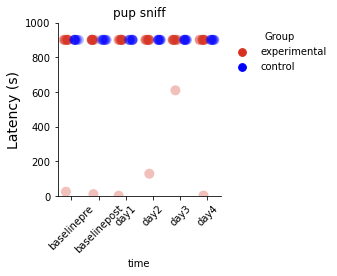

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/668430578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


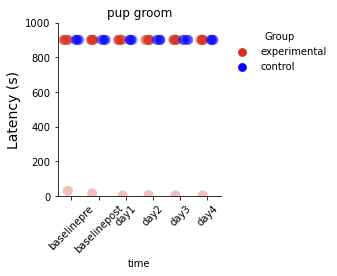

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/668430578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


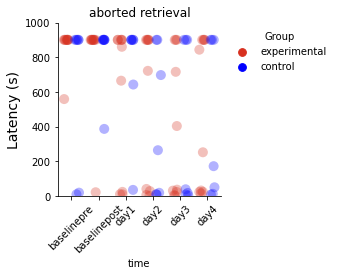

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/668430578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


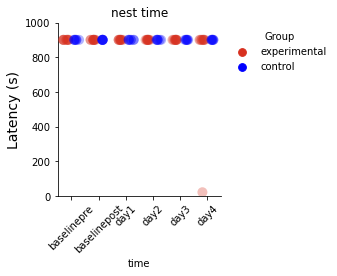

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/668430578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


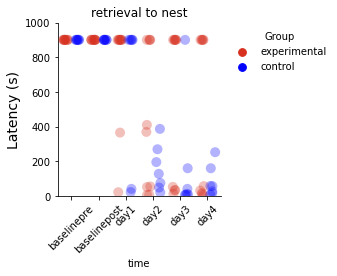

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/668430578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


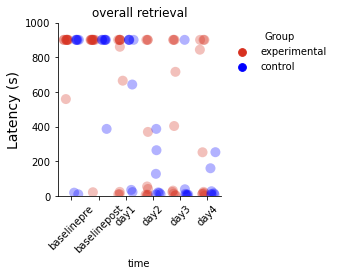

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/668430578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


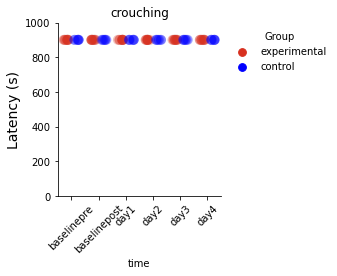

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/668430578.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


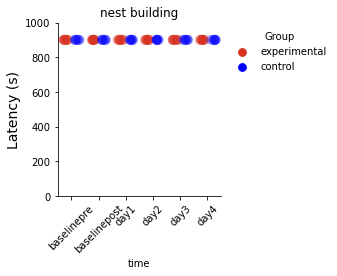

In [6]:
for behaviour in behaviours.behaviour.unique():
    behav_df = behaviours[behaviours.behaviour == behaviour]
    
    behav_df.latency = pd.to_numeric(behav_df.latency)
    # mean = behav_df.groupby(by = 'time').mean().reset_index()
    # st_error = behav_df.groupby(by = 'time').std()/np.sqrt(len(behav_df.ID.unique()))
    # st_error = st_error.reset_index()
    
    # model = smf.ols('latency ~ C(time)', data = behav_df).fit()
    # print(sm.stats.anova_lm(model, typ = 2))
    
    # m_comp = pairwise_tukeyhsd(endog=behav_df.latency, groups = behav_df.time, alpha = 0.05)
    # print(m_comp._results_table)

    
#     fig, ax = plt.subplots(figsize = [10, 5])
#     fig.tight_layout()
    
#     plt.plot(mean.time, mean.latency, color = 'purple', alpha = 0.7)
#     plt.fill_between(mean.time,  mean.latency + st_error.latency, mean.latency - st_error.latency, 
#                      color = 'purple', alpha = 0.05)
    
#     ax.set_xlim(['baseline', 'day50'])
#     ax.set_ylim([0, 900])
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
    
#     plt.xticks(fontsize = 12)
#     plt.yticks(fontsize = 12)
    
#     plt.ylabel('Latency (s)', fontsize = 14)
    
#     plt.title(behaviour)
    
#     plt.savefig(f'plots/{behaviour}_latency.jpg', dpi = 300, bbox_inches = 'tight')
#     plt.show()

    
#     fig, ax = plt.subplots(figsize = [10, 5])
#     fig.tight_layout()
    
#     sns.pointplot(mean.time, mean.latency, color = 'purple', alpha = 0.7)
#     # plt.fill_between(mean.time,  mean.latency + st_error.latency, mean.latency - st_error.latency, 
#                      # color = 'purple', alpha = 0.05)
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
    
#     plt.xticks(fontsize = 12)
#     plt.yticks(fontsize = 12)
    
#     plt.ylabel('Latency (s)', fontsize = 14)
#     plt.title(behaviour)
#     plt.show()
    
    fig, ax = plt.subplots(figsize = [3,3])
    fig.tight_layout()
    
    # define custom palette for the two groups
    custom_palette = {"experimental": "#d7301f", "control": "blue"}

    # sns.boxplot(x='time', y='latency', data = behav_df, color = 'white', width = 0.5)
    sns.stripplot(x = "time", y = "latency", data = behav_df, hue = 'group', palette = custom_palette, alpha = 0.3, size = 10, dodge=True, jitter = 0.2)
    # sns.barplot(x = "time", y = "latency", data = mean, palette = ["purple"], errorbar = "se", alpha = 0.3)
    # sns.lineplot(x = "time", y = "latency", data = behav_df, style = "ID", color = 'grey', alpha = 0.4, size = 7, marker = 'o', markersize=10, markerfacecolor='purple',legend = False)

    ax.set_ylim([0, 1000])
    plt.ylabel('Latency (s)', fontsize = 14)
    plt.title(behaviour)
    plt.xticks(rotation=45)
    sns.despine()
    
    # adjust legend position
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title="Group", loc='upper right', bbox_to_anchor=(1.7, 1), frameon=False)

    # plt.savefig(f'plots_chem_bnst/{behaviour}_latency.jpg', dpi = 300, bbox_inches = 'tight')
    plt.show()
    


/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/3503575408.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


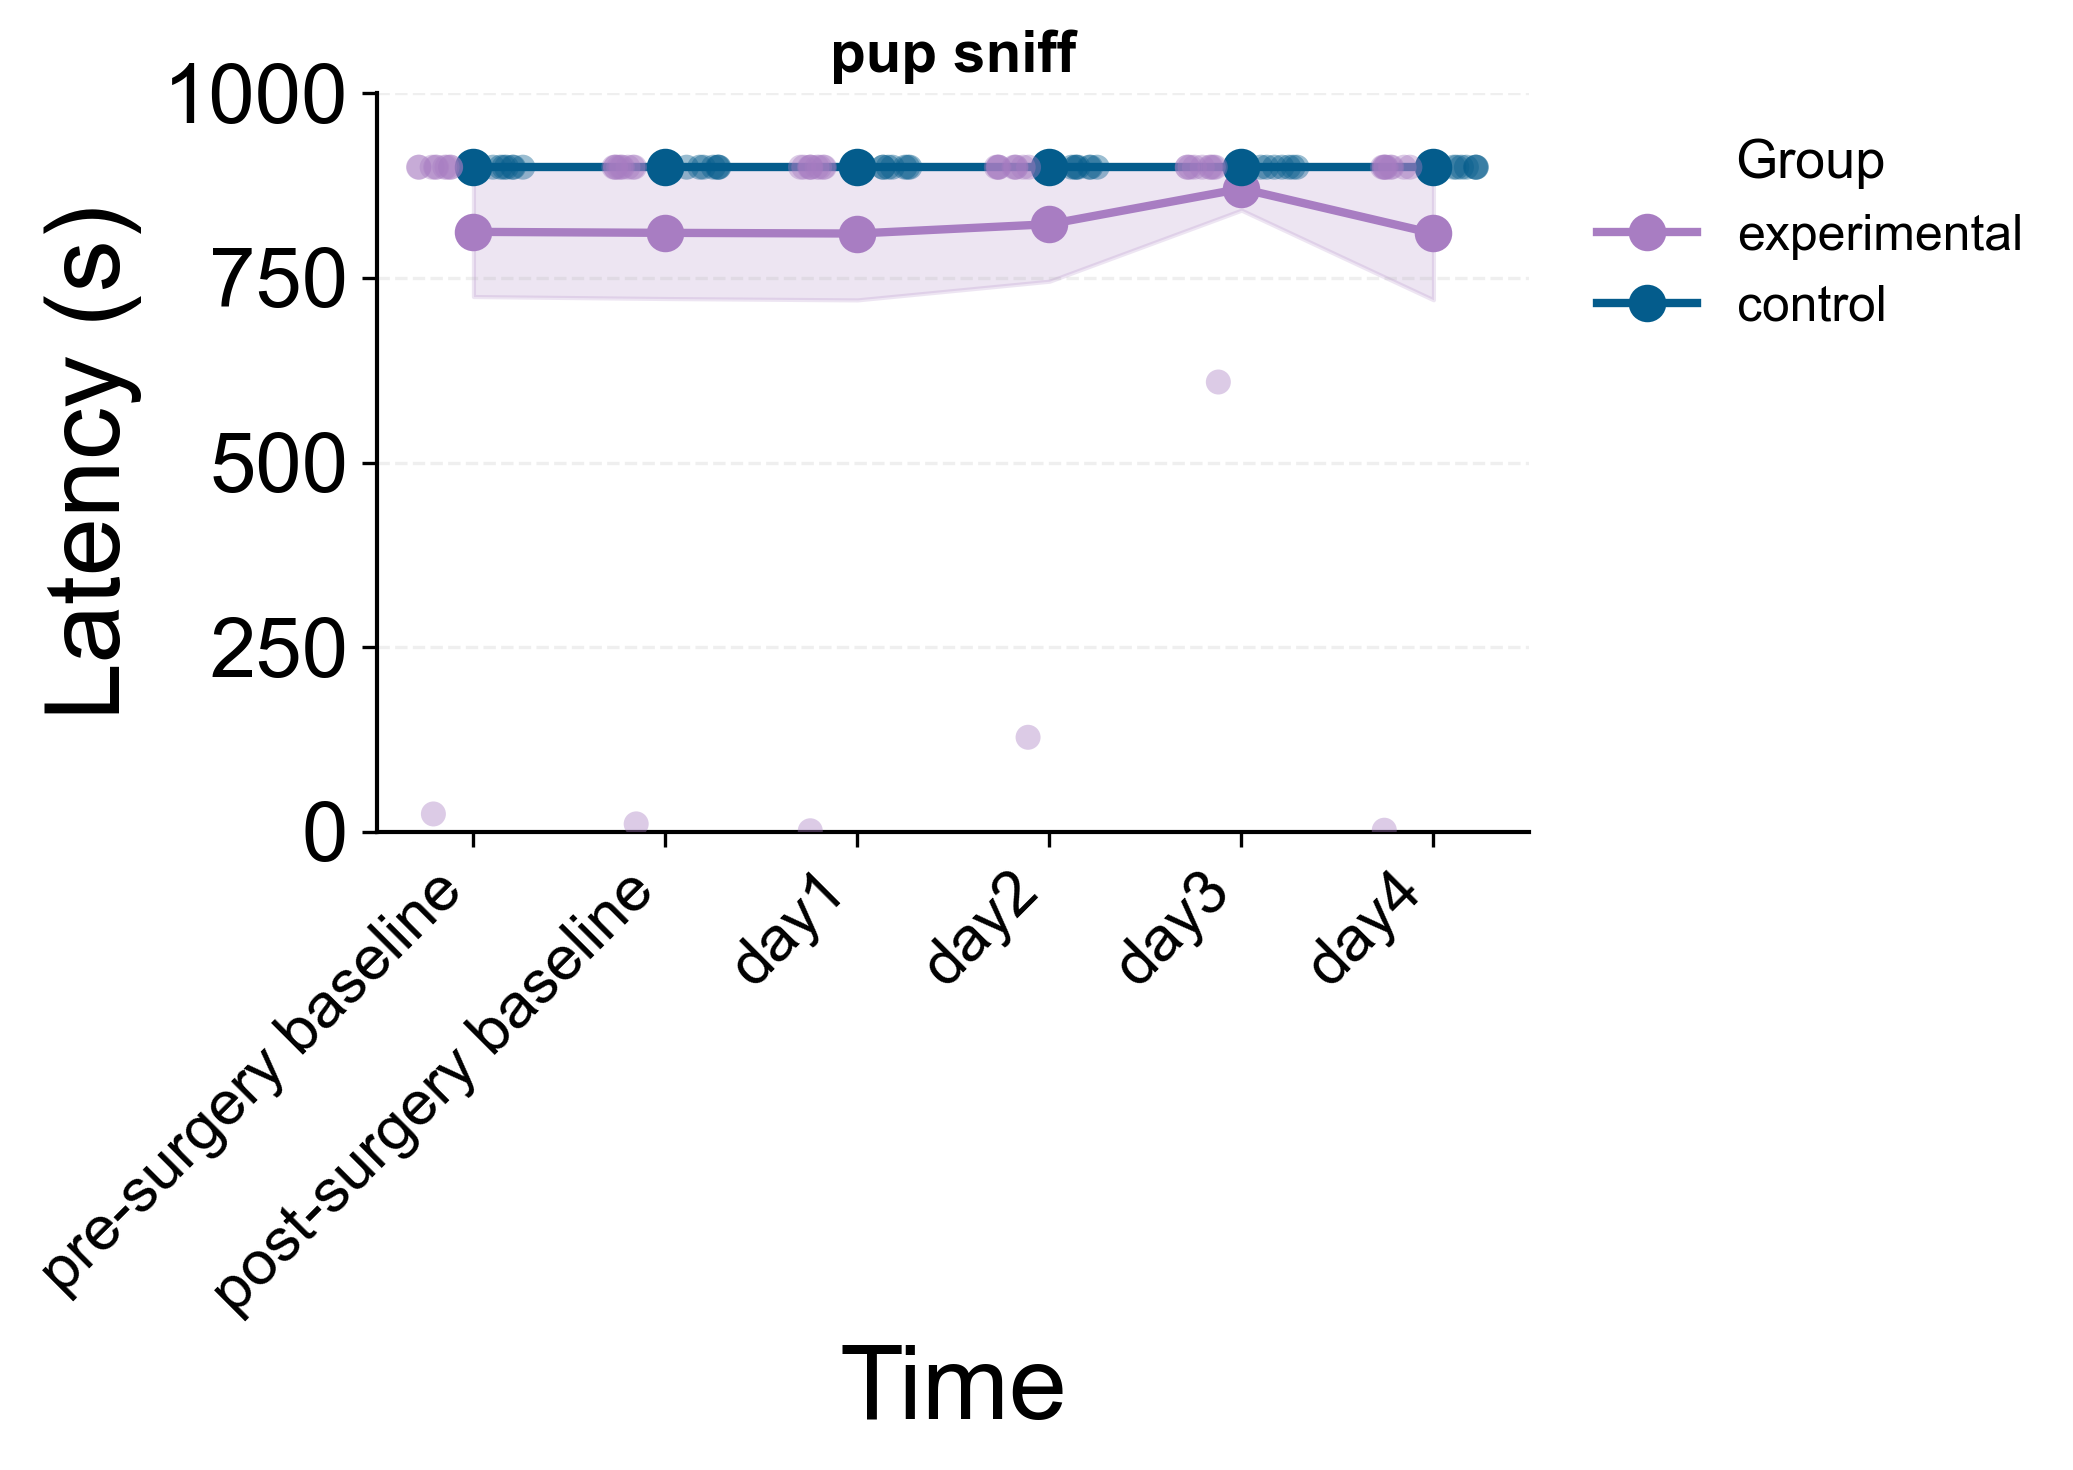

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/3503575408.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


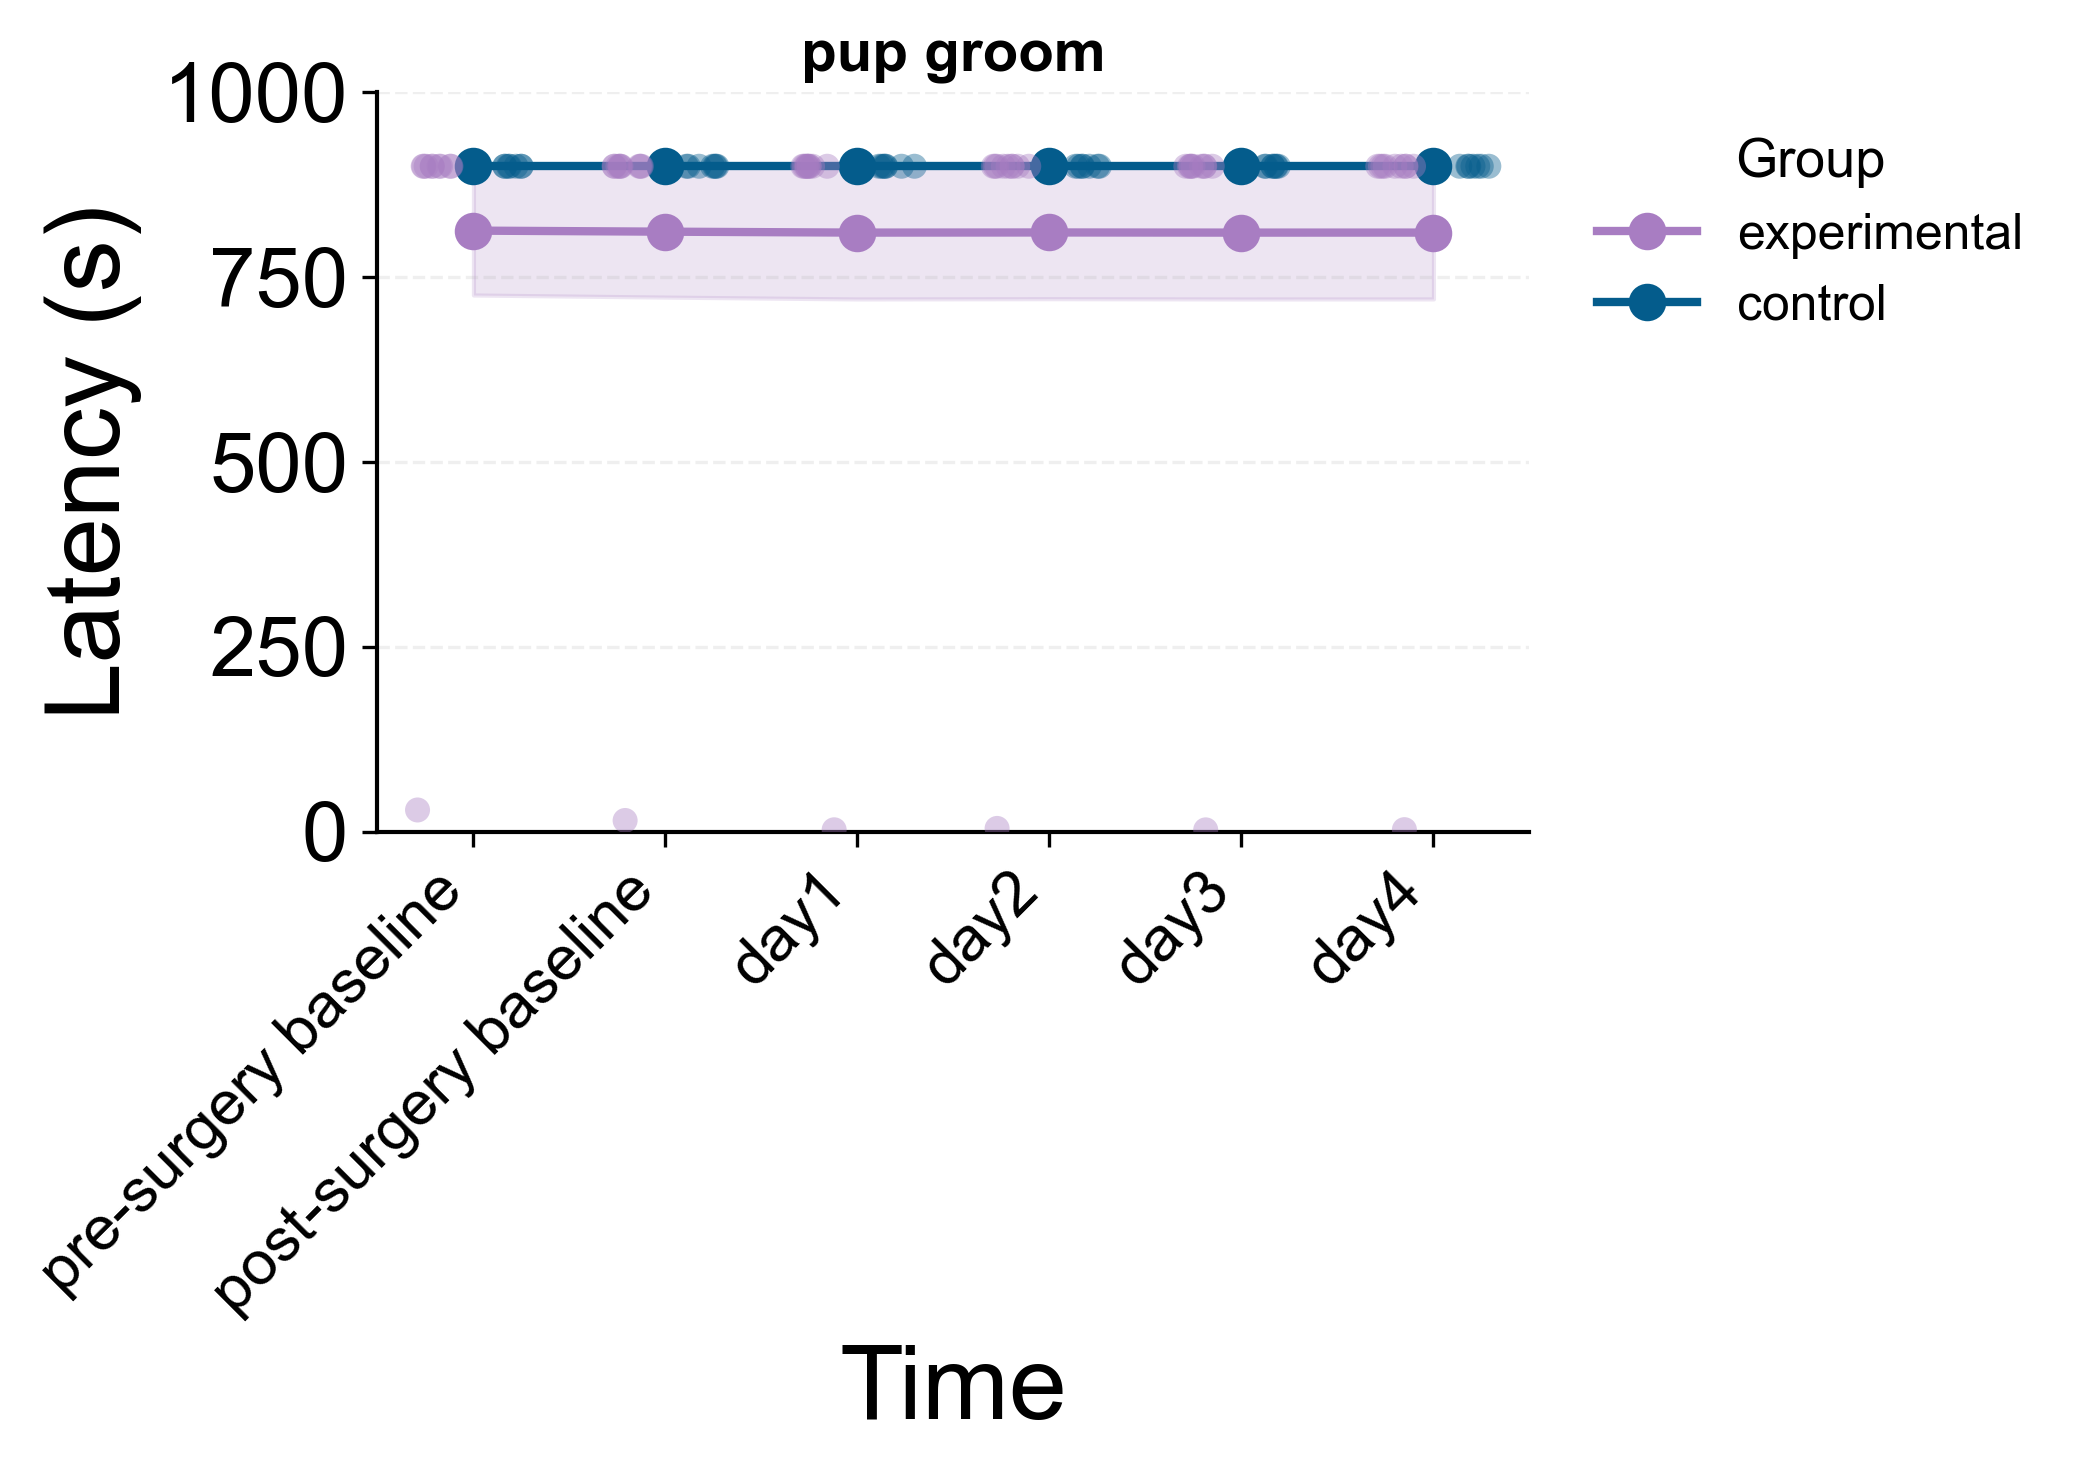

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/3503575408.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


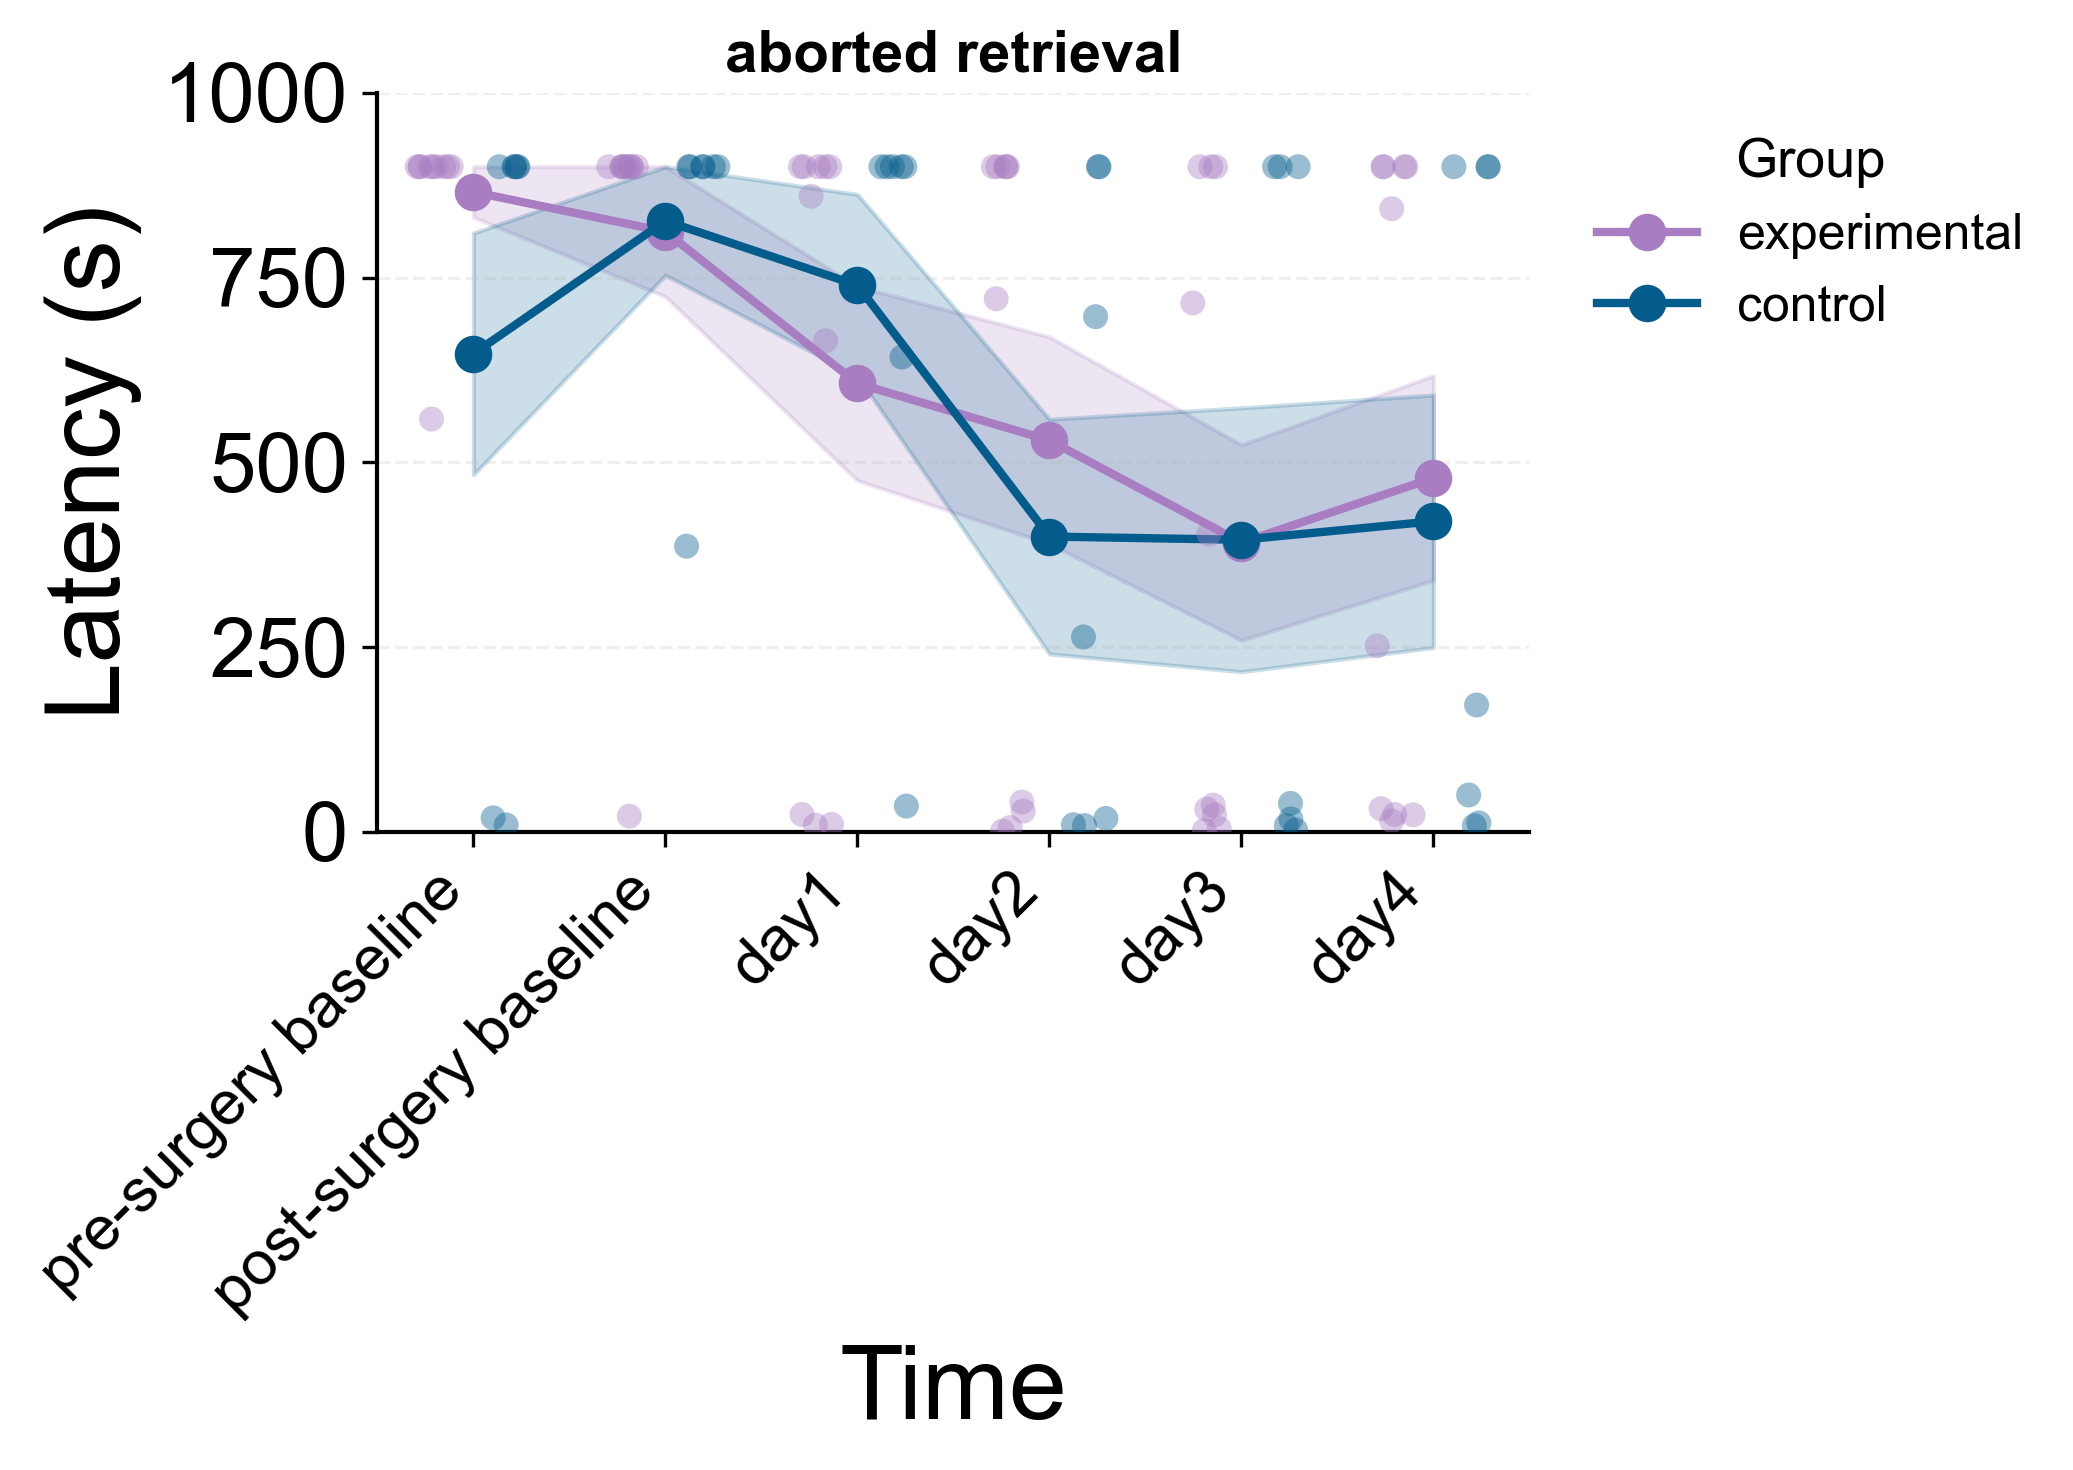

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/3503575408.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


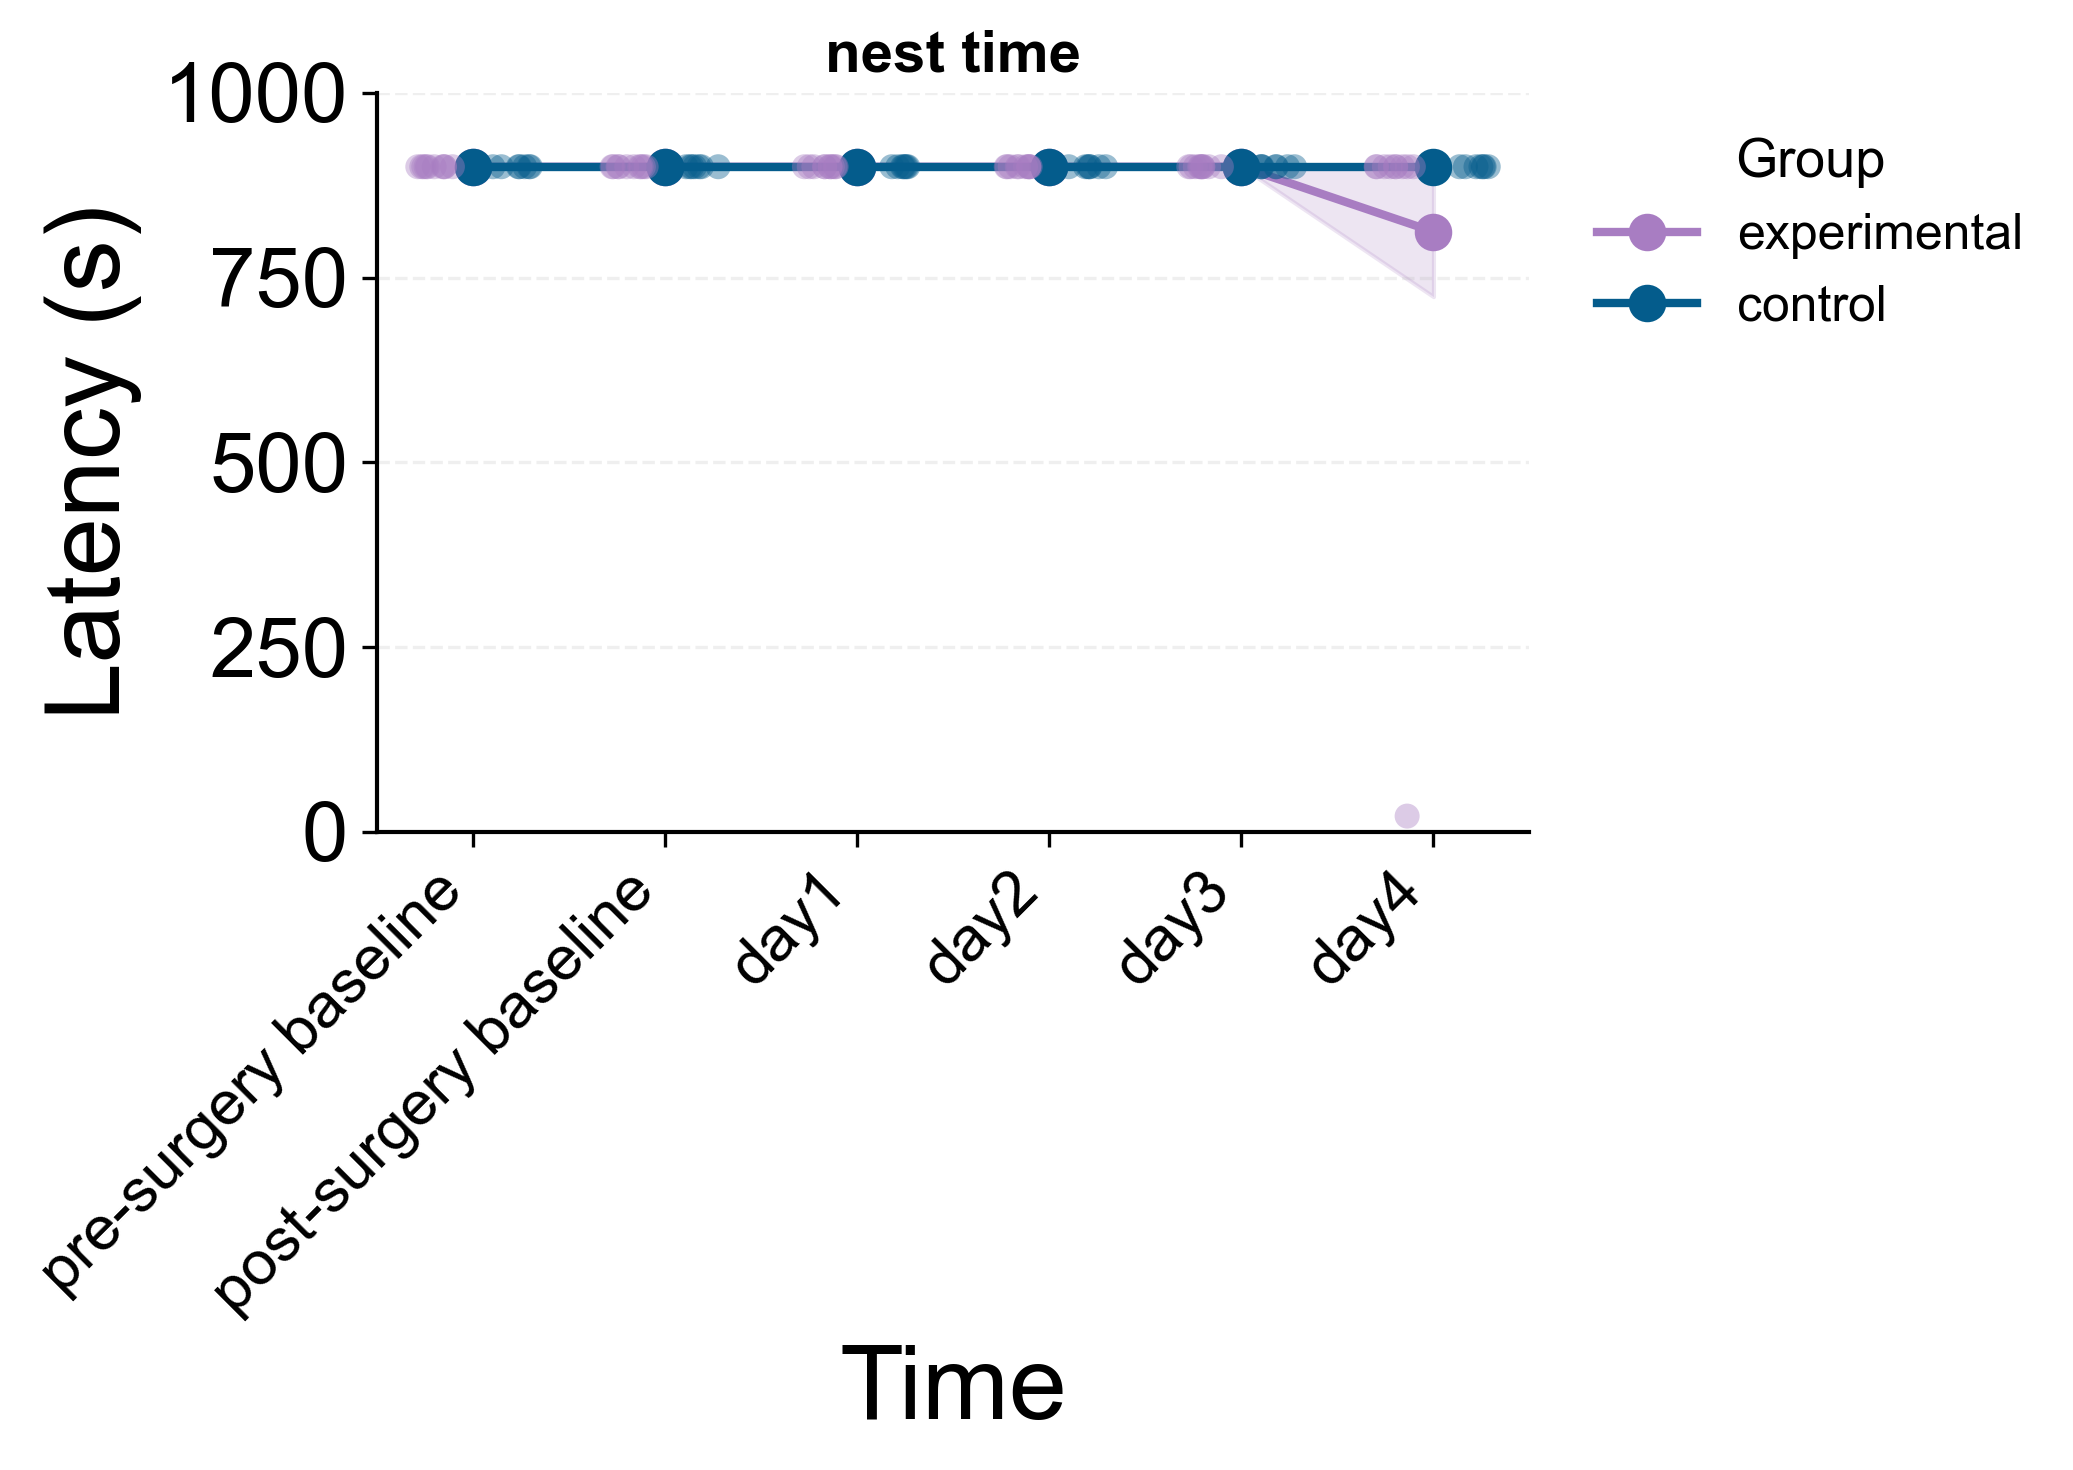

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/3503575408.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


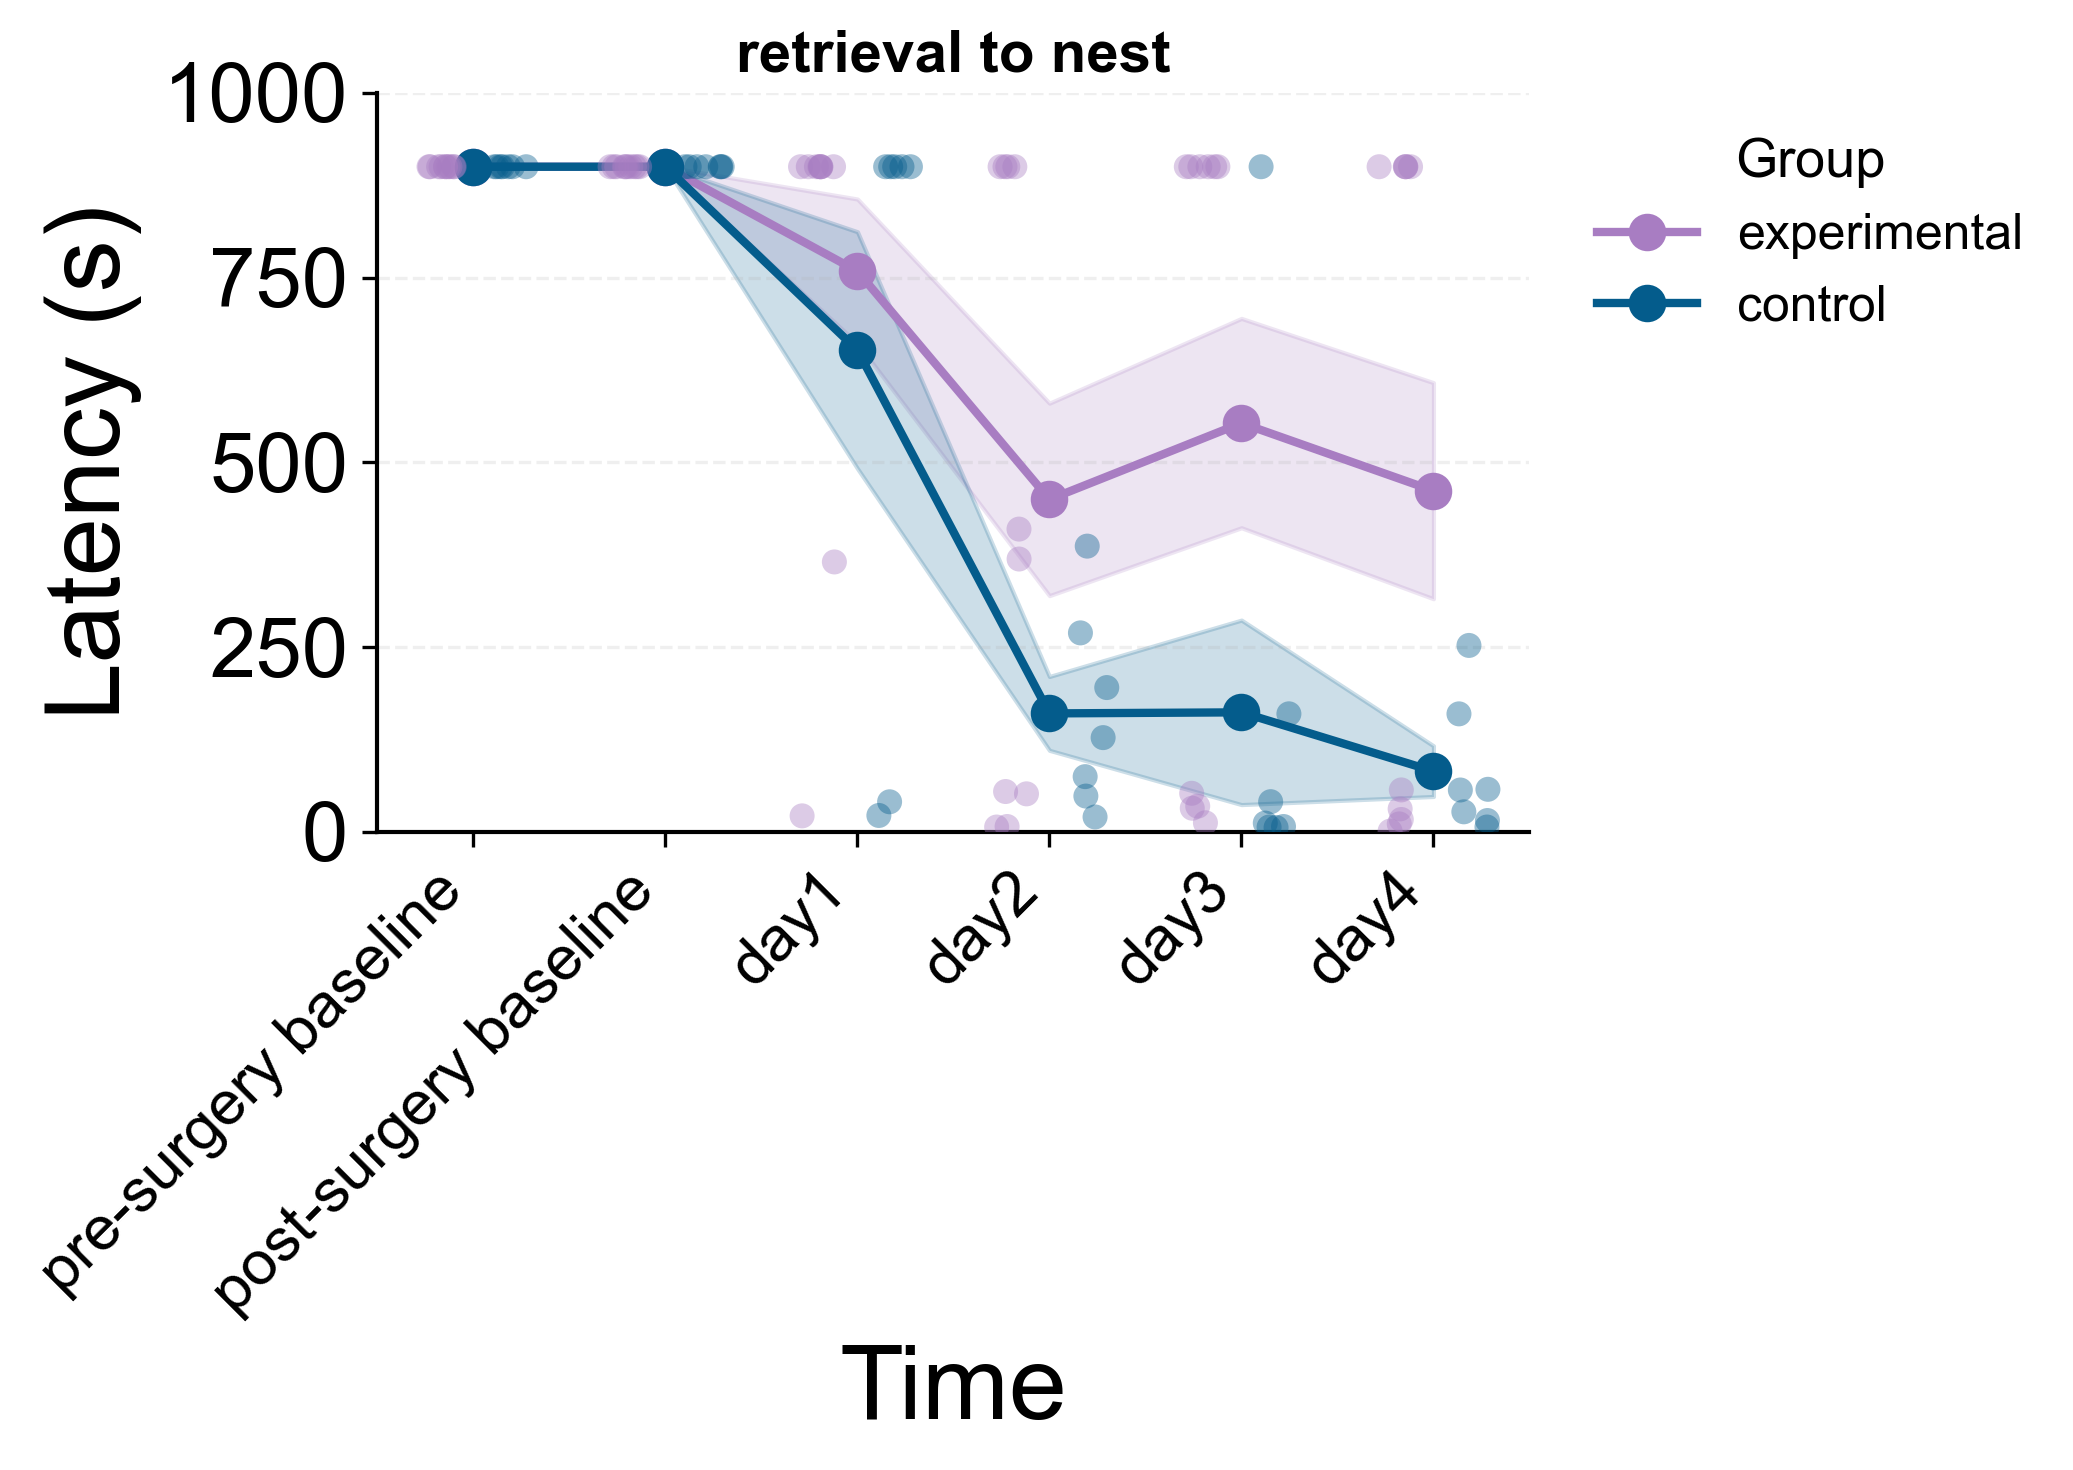

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/3503575408.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


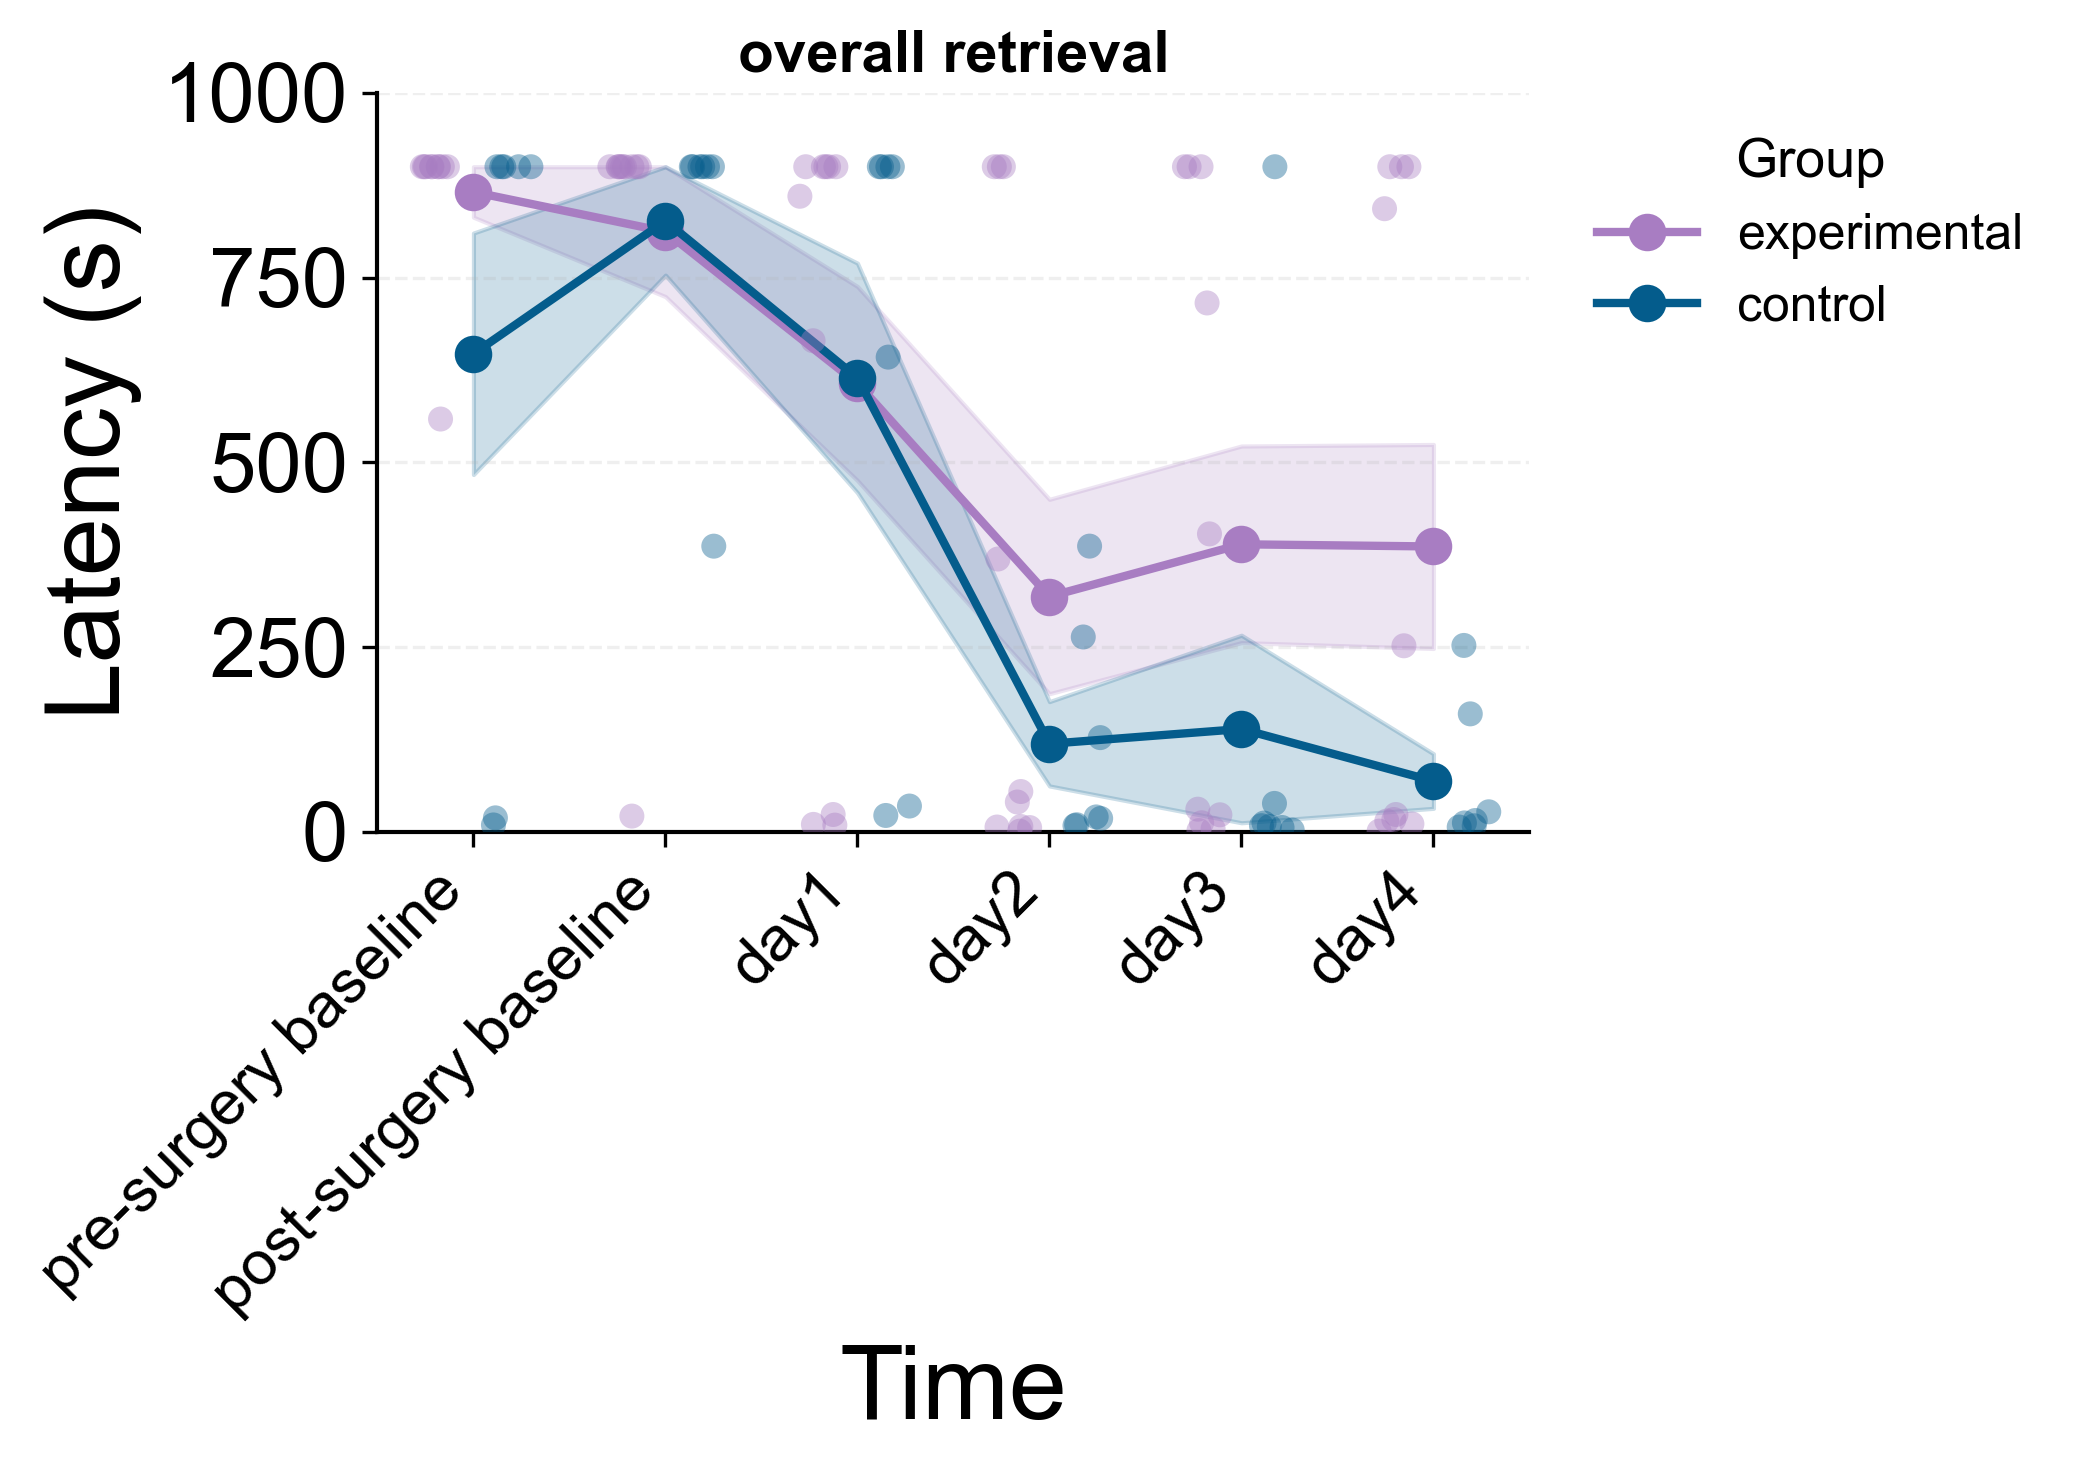

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/3503575408.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


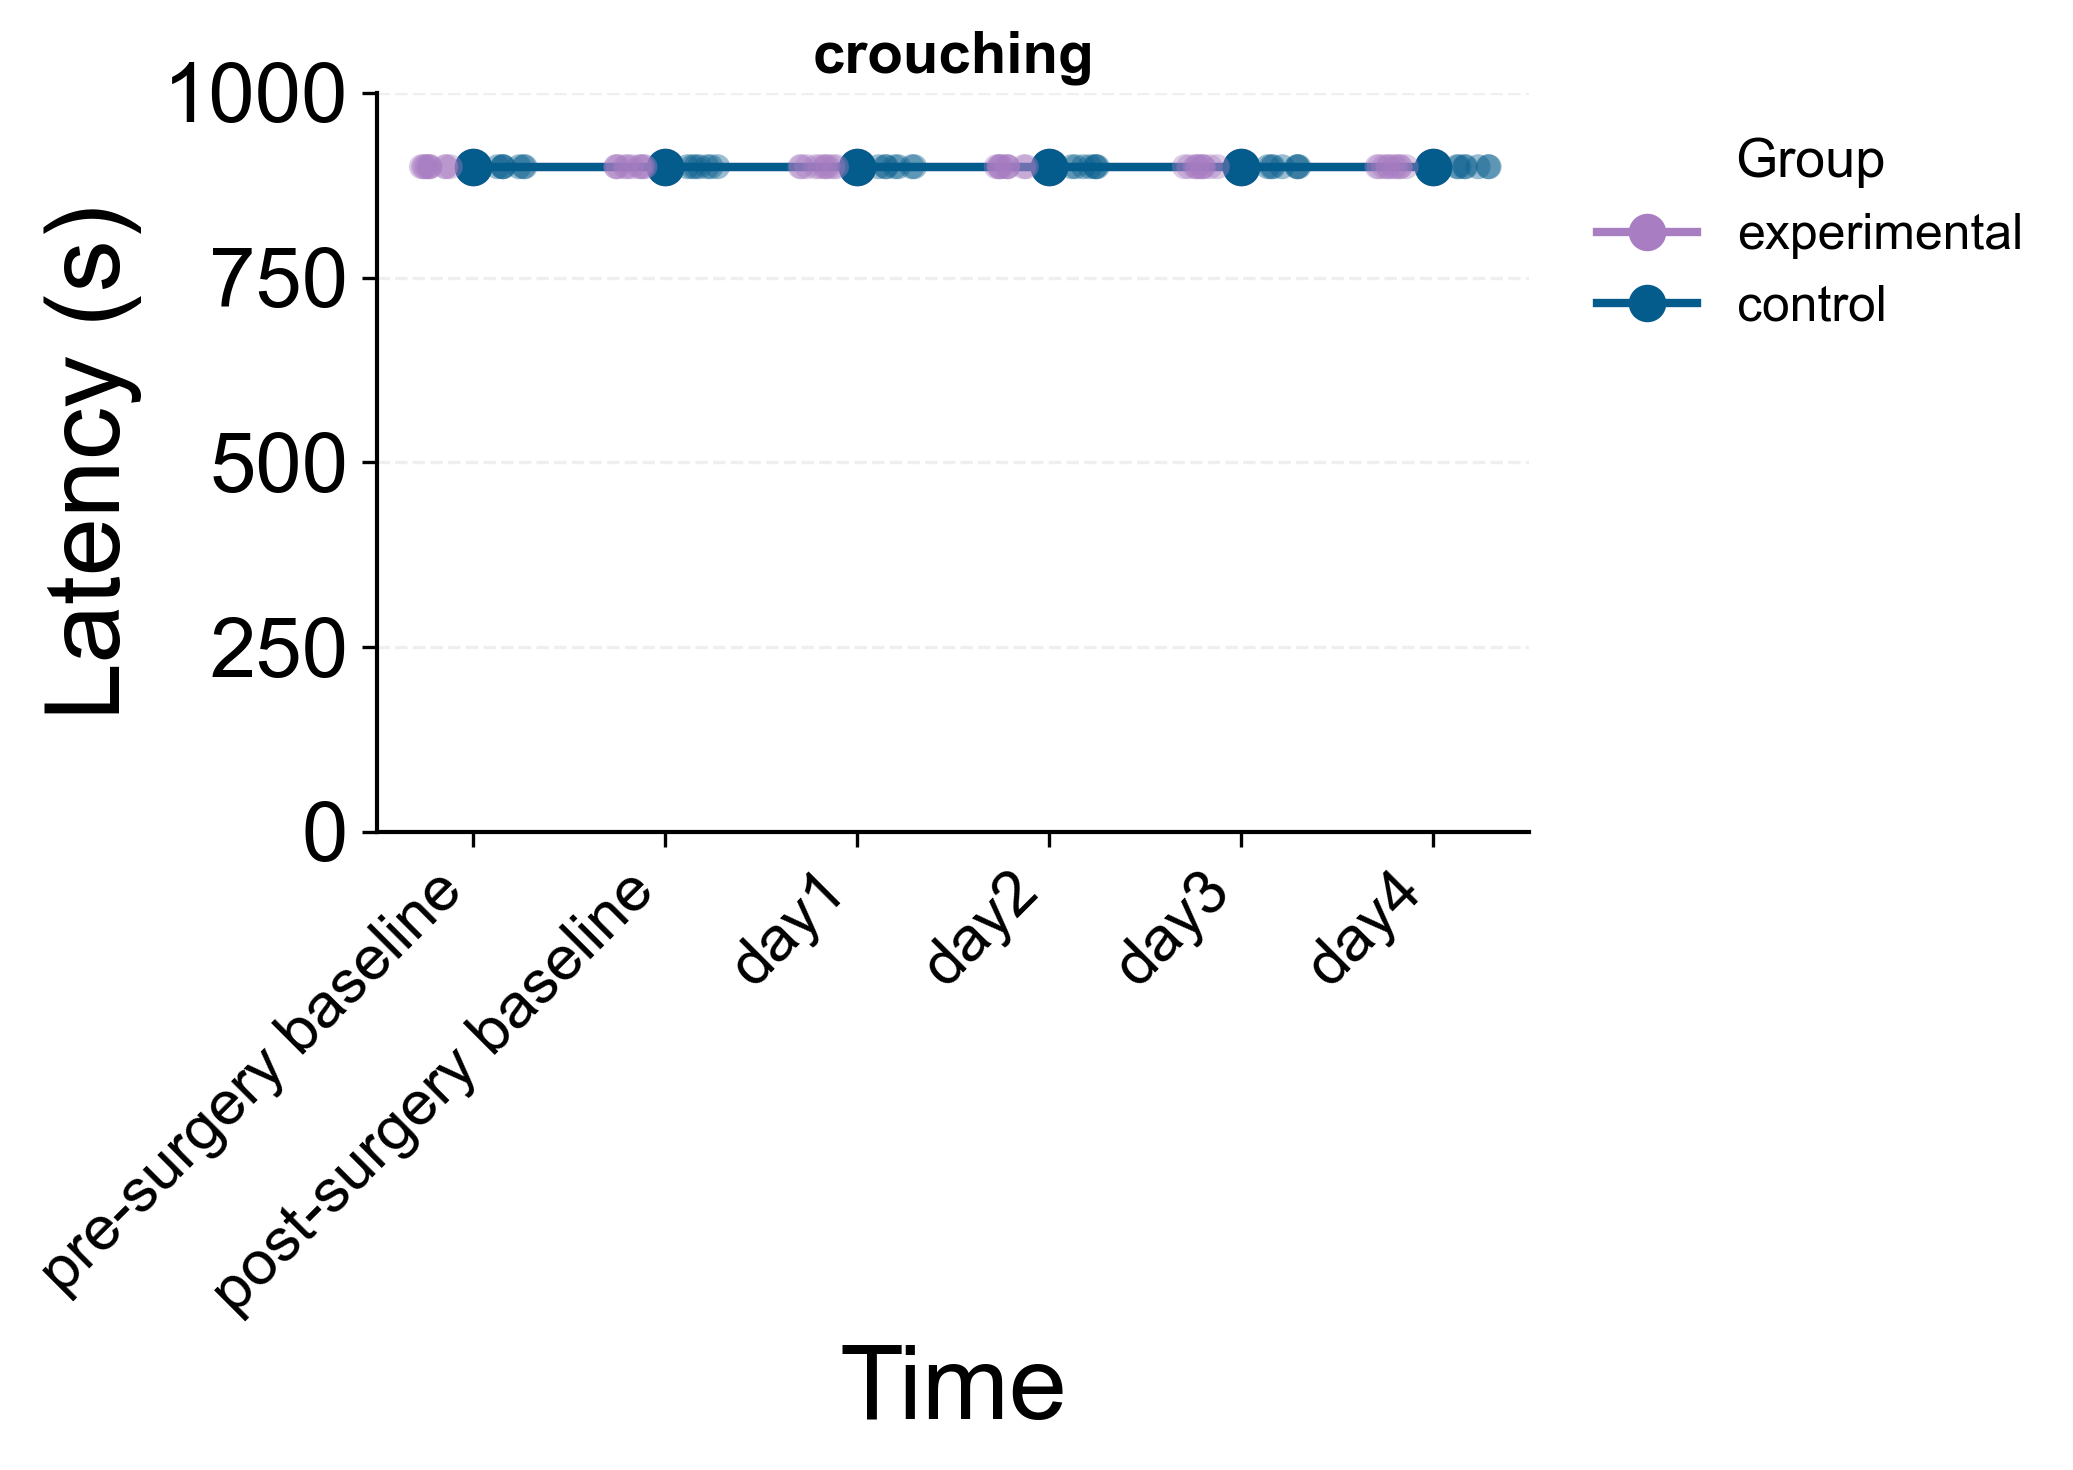

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_4539/3503575408.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


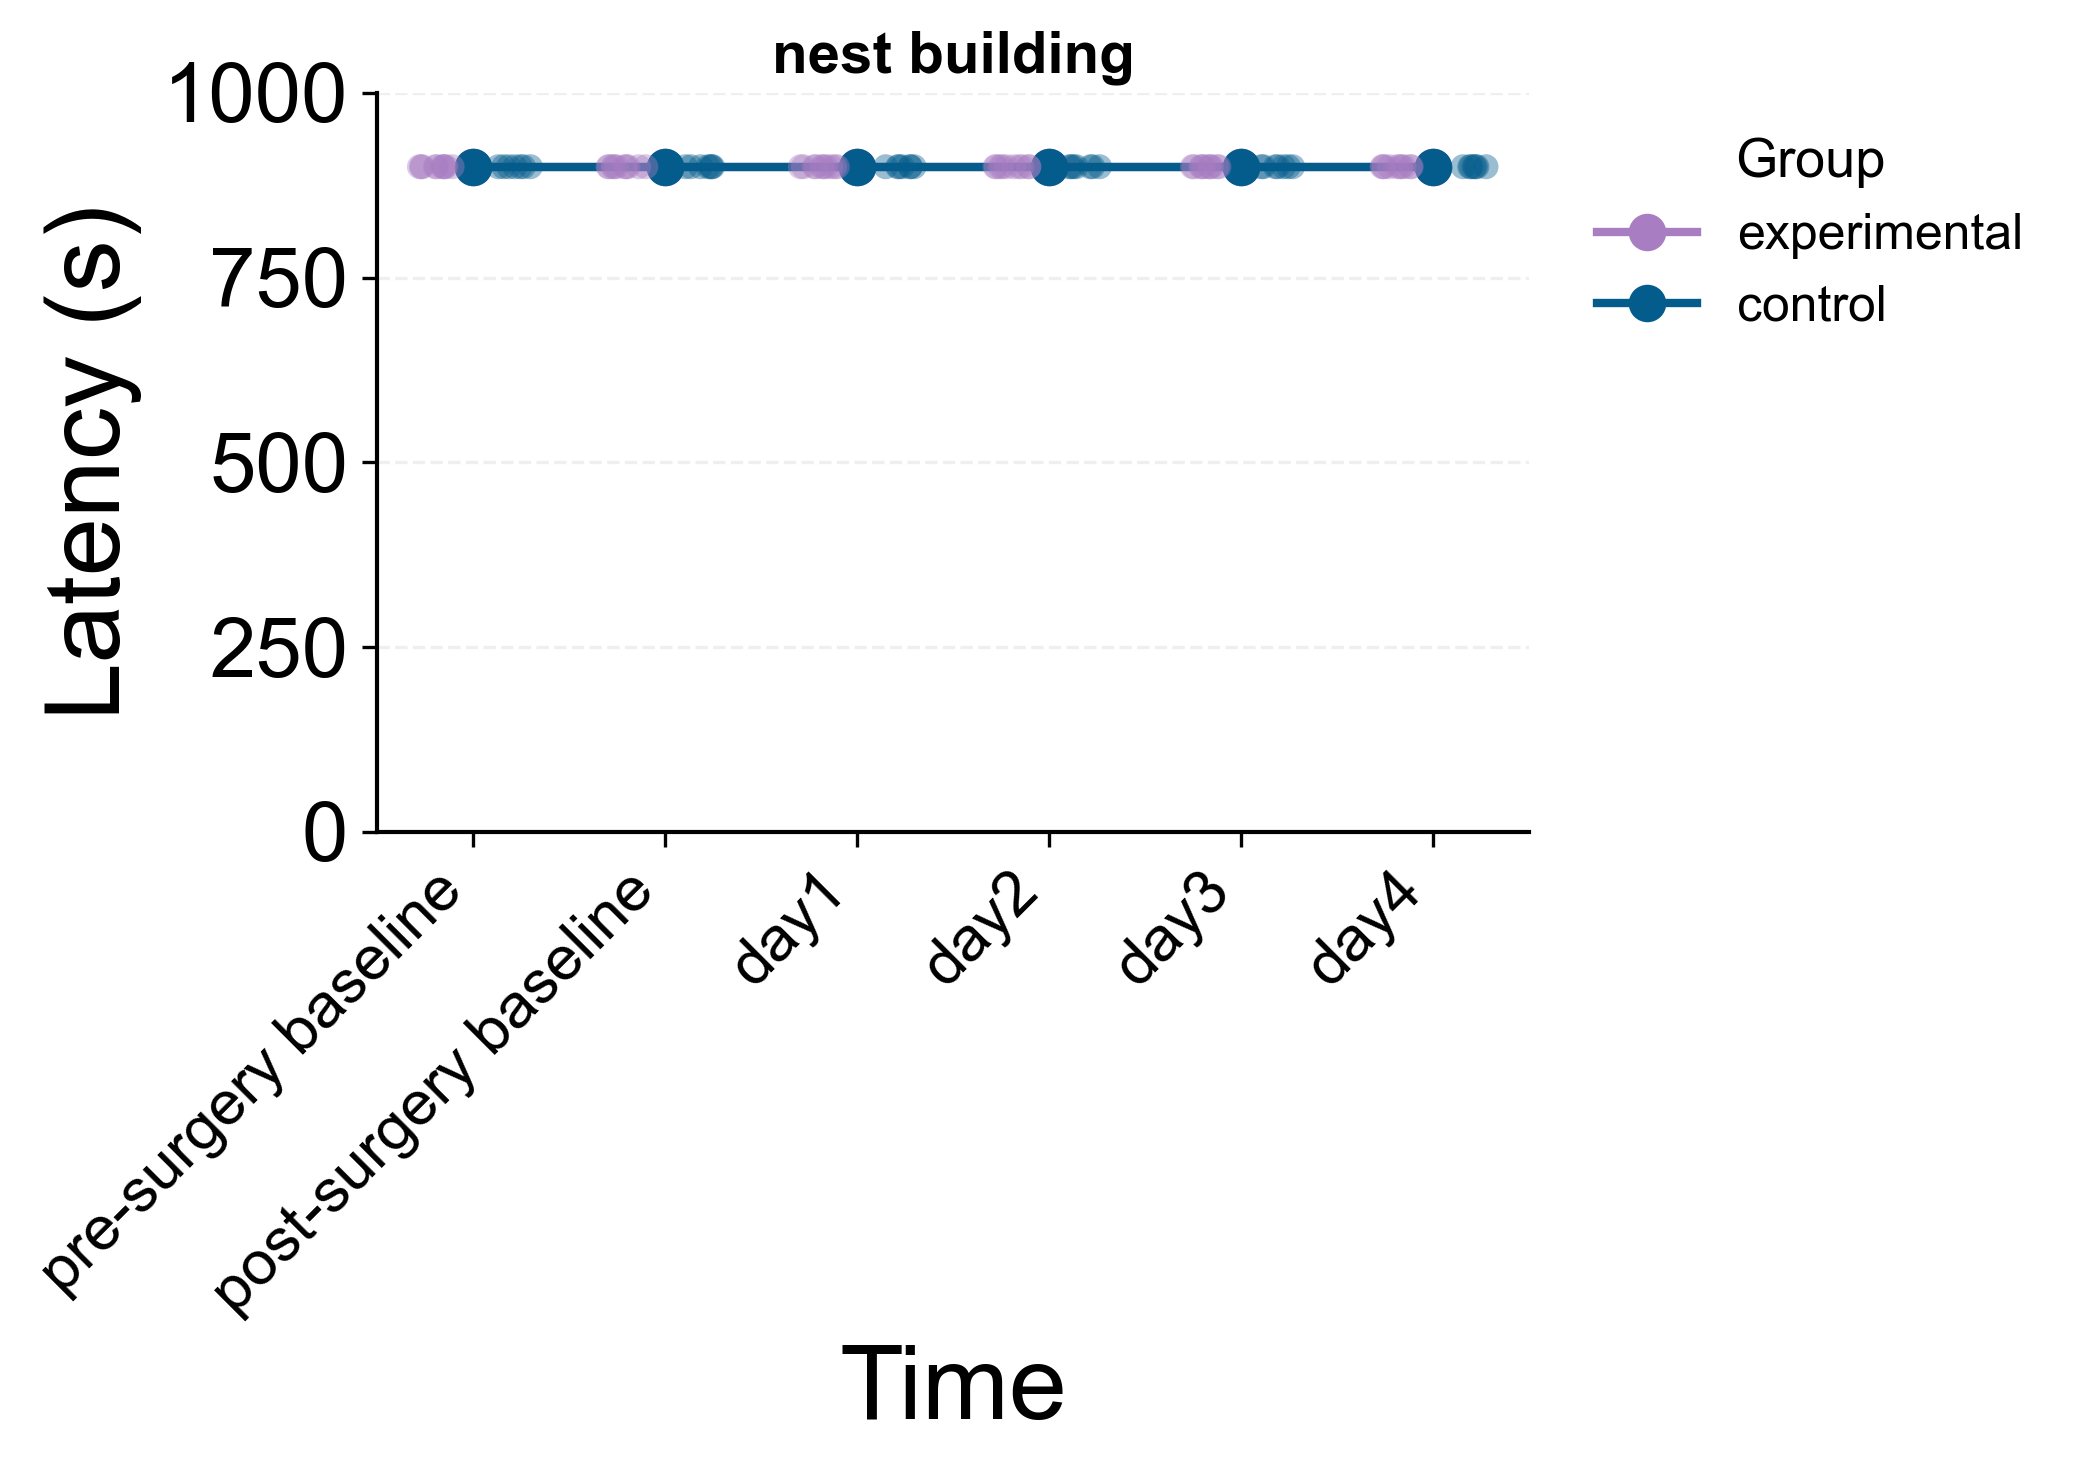

In [7]:
# Set publication-ready style parameters
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,  # Reduced font size for compact plots
    'axes.linewidth': 1,  # Thinner axes lines
    'axes.labelsize': 25,  # Smaller label size
    'axes.titlesize': 14,  # Smaller title size
    'xtick.labelsize': 15,  # Adjusted for longer labels
    'ytick.labelsize': 20,  # Smaller tick labels
    'figure.dpi': 300
})

for behaviour in behaviours.behaviour.unique():
    behav_df = behaviours[behaviours.behaviour == behaviour]
    
    # Convert to numeric if needed
    behav_df.latency = pd.to_numeric(behav_df.latency)
    
    # Rename time points for clarity
    behav_df = behav_df.copy()  # Create a copy to avoid SettingWithCopyWarning
    behav_df['time'] = behav_df['time'].replace({
        'baselinepre': 'pre-surgery baseline',
        'baselinepost': 'post-surgery baseline'
    })
    
    # Create figure with compact size
    fig, ax = plt.subplots(figsize=(6, 5))  # Slightly wider to accommodate labels
    
    # Add a subtle grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    
    # Define custom palette for groups using xkcd colors
    group_palette = {
        "experimental": "#a87dc2",  # wisteria from xkcd
        "control": "#045c8c"        # muted blue from xkcd
    }
    
    # Calculate means and standard errors for each group and time point
    # First create a summary dataframe
    summary = behav_df.groupby(['time', 'group'])['latency'].agg(['mean', 'sem']).reset_index()
    
    # Create lineplot for means with error bands
    for group in behav_df['group'].unique():
        group_data = summary[summary['group'] == group]
        
        # Plot the mean line
        plt.plot(group_data['time'], group_data['mean'], 'o-', 
                 color=group_palette[group], 
                 label=group,
                 linewidth=2, 
                 markersize=8)
        
        # Add error bands (SEM)
        plt.fill_between(group_data['time'], 
                         group_data['mean'] - group_data['sem'],
                         group_data['mean'] + group_data['sem'],
                         color=group_palette[group],
                         alpha=0.2)
    
    # Overlay individual data points with stripplot (removed the legend=False parameter)
    strip = sns.stripplot(x='time', y='latency', hue='group', data=behav_df,
                         palette=group_palette,
                         alpha=0.4,  # Lower alpha for the points
                         size=6,
                         dodge=True,  # Separate points by group
                         jitter=0.2,
                         linewidth=0)
    
    # Remove the stripplot legend
    if ax.get_legend():
        ax.get_legend().remove()
    
    # Set y-axis limits and tick marks every 250s
    ax.set_ylim([0, 1000])
    ax.set_yticks([0, 250, 500, 750, 1000])
    
    # Adjust labels for compact size
    plt.ylabel('Latency (s)', labelpad=5)
    plt.xlabel('Time', labelpad=5)  # Empty xlabel
    
    # Add title with minimal spacing
    plt.title(behaviour, pad=5, fontweight='bold')
    
    # Rotate x-tick labels for better readability with long labels
    plt.xticks(rotation=45, ha='right')
    
    # Custom legend from the line plot
    handles, labels = ax.get_legend_handles_labels()
    # Keep only the first set of handles (from lineplot)
    handles = handles[:2]  
    labels = labels[:2]
    # Position legend outside plot area
    ax.legend(handles, labels, title="Group", loc='upper left', bbox_to_anchor=(1.02, 1), 
              frameon=False, fontsize=12, title_fontsize=13)
    
    # Remove unnecessary spines
    sns.despine()
    
    # Adjust figure size to accommodate legend
    fig.tight_layout()
    # Add extra space for the legend
    plt.subplots_adjust(right=0.85)
    
    # Save figures in publication-ready formats
    plt.savefig(f'plots_chem_mea/{behaviour}_latency_line.png', dpi=500, bbox_inches='tight')
    
    plt.show()

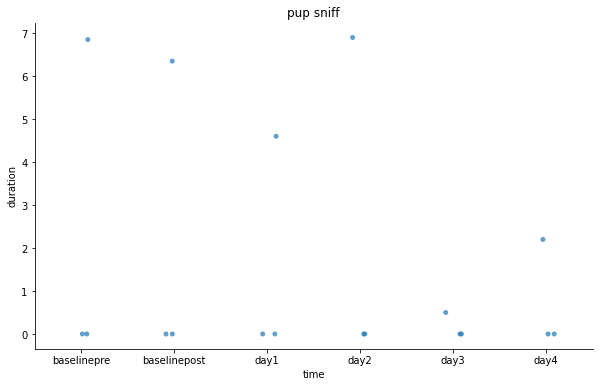

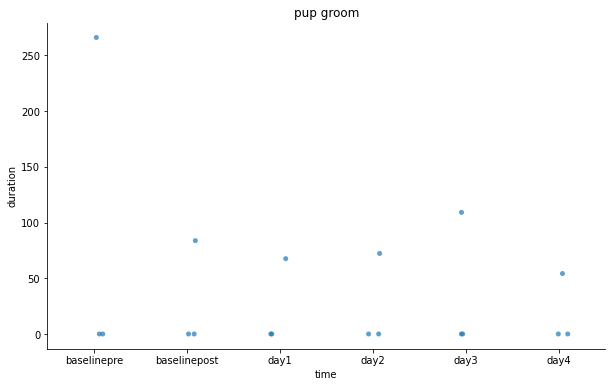

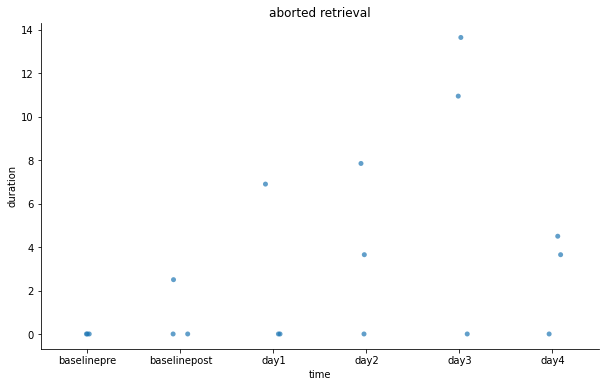

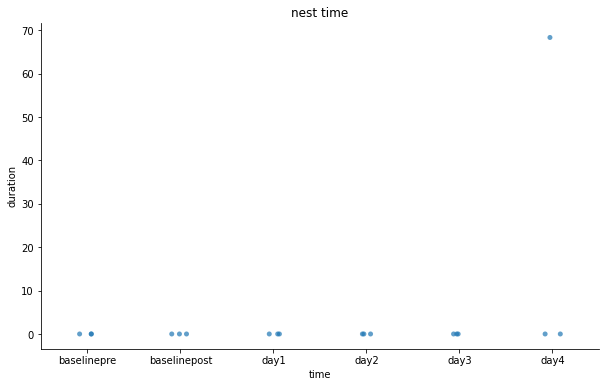

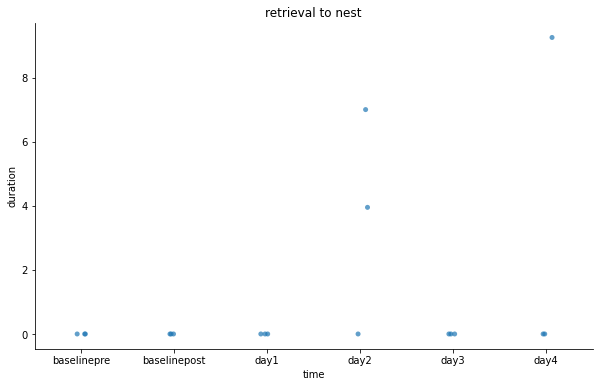

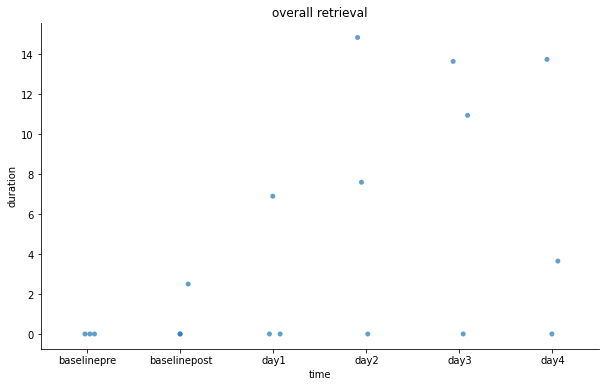

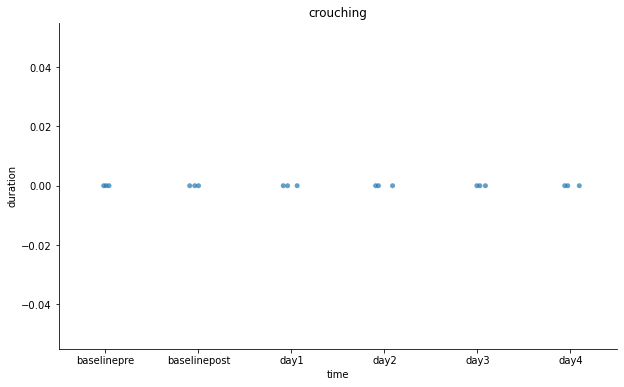

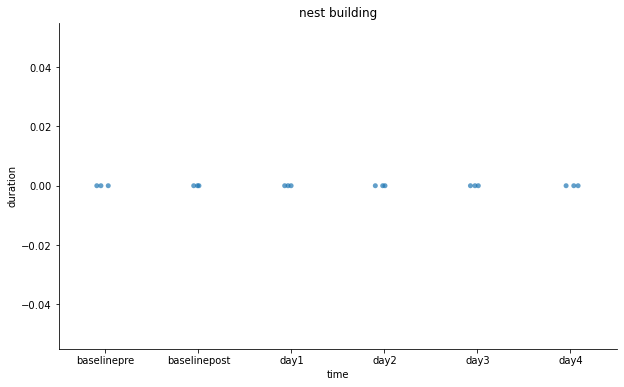

In [10]:
for behaviour in behaviours.behaviour.unique():
    behav_df = behaviours[behaviours.behaviour == behaviour]
    
    plt.subplots(figsize = [10,6])
    sns.stripplot(x = "time", y = "duration", data = behav_df, palette = ["Tab:blue"], alpha = 0.7)
    plt.title(behaviour)
    sns.despine()
    # plt.savefig(f'plots_chem_mea/{behaviour}_duration.jpg', dpi = 300, bbox_inches = 'tight')
    plt.show()

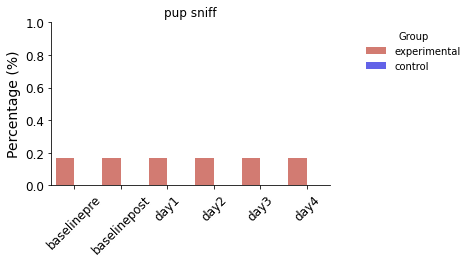

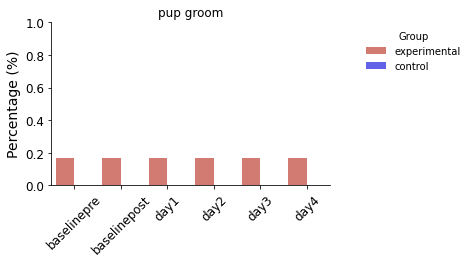

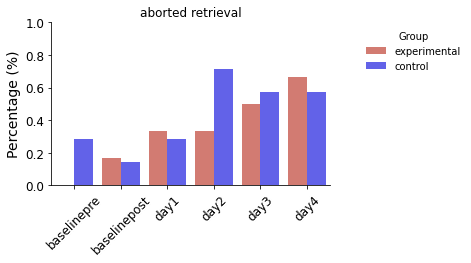

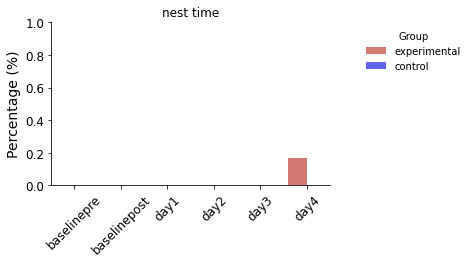

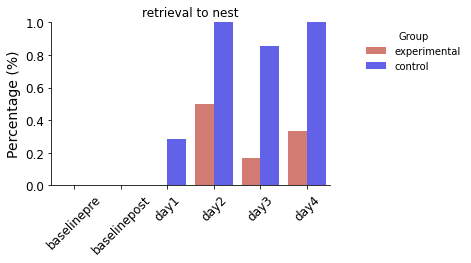

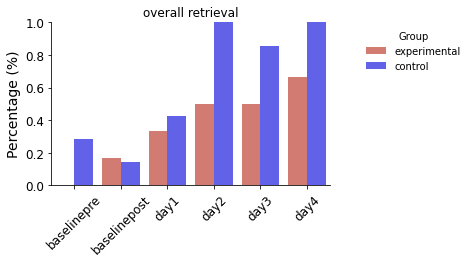

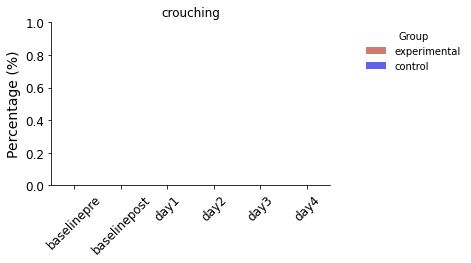

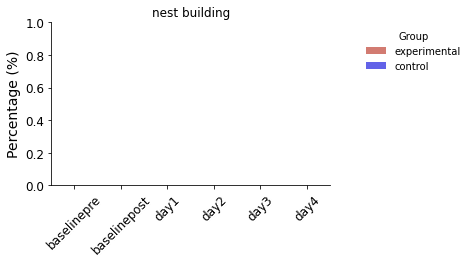

In [12]:
for behaviour in percentages.behaviour.unique():
    perc_df = percentages[percentages.behaviour == behaviour]
    
    fig, ax = plt.subplots(figsize = [5, 3])

    # define custom palette for the two groups
    custom_palette = {"experimental": "#d7301f", "control": "blue"}

    sns.barplot(x = "time", y = "percentage", data = perc_df, hue= 'group', palette = custom_palette, alpha = 0.7)
    plt.title(behaviour)
    
    plt.ylim([0, 1])
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xticks(rotation = 45)
    
    plt.xlabel('')
    plt.ylabel('Percentage (%)',fontsize = 14)

    # adjust legend position
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, title="Group", loc='upper right', bbox_to_anchor=(1.5, 1), frameon=False)
    
    sns.despine()
    # plt.savefig(f'plots_chem_bnst/{behaviour}_percentage.jpg', dpi = 300)
    plt.show()

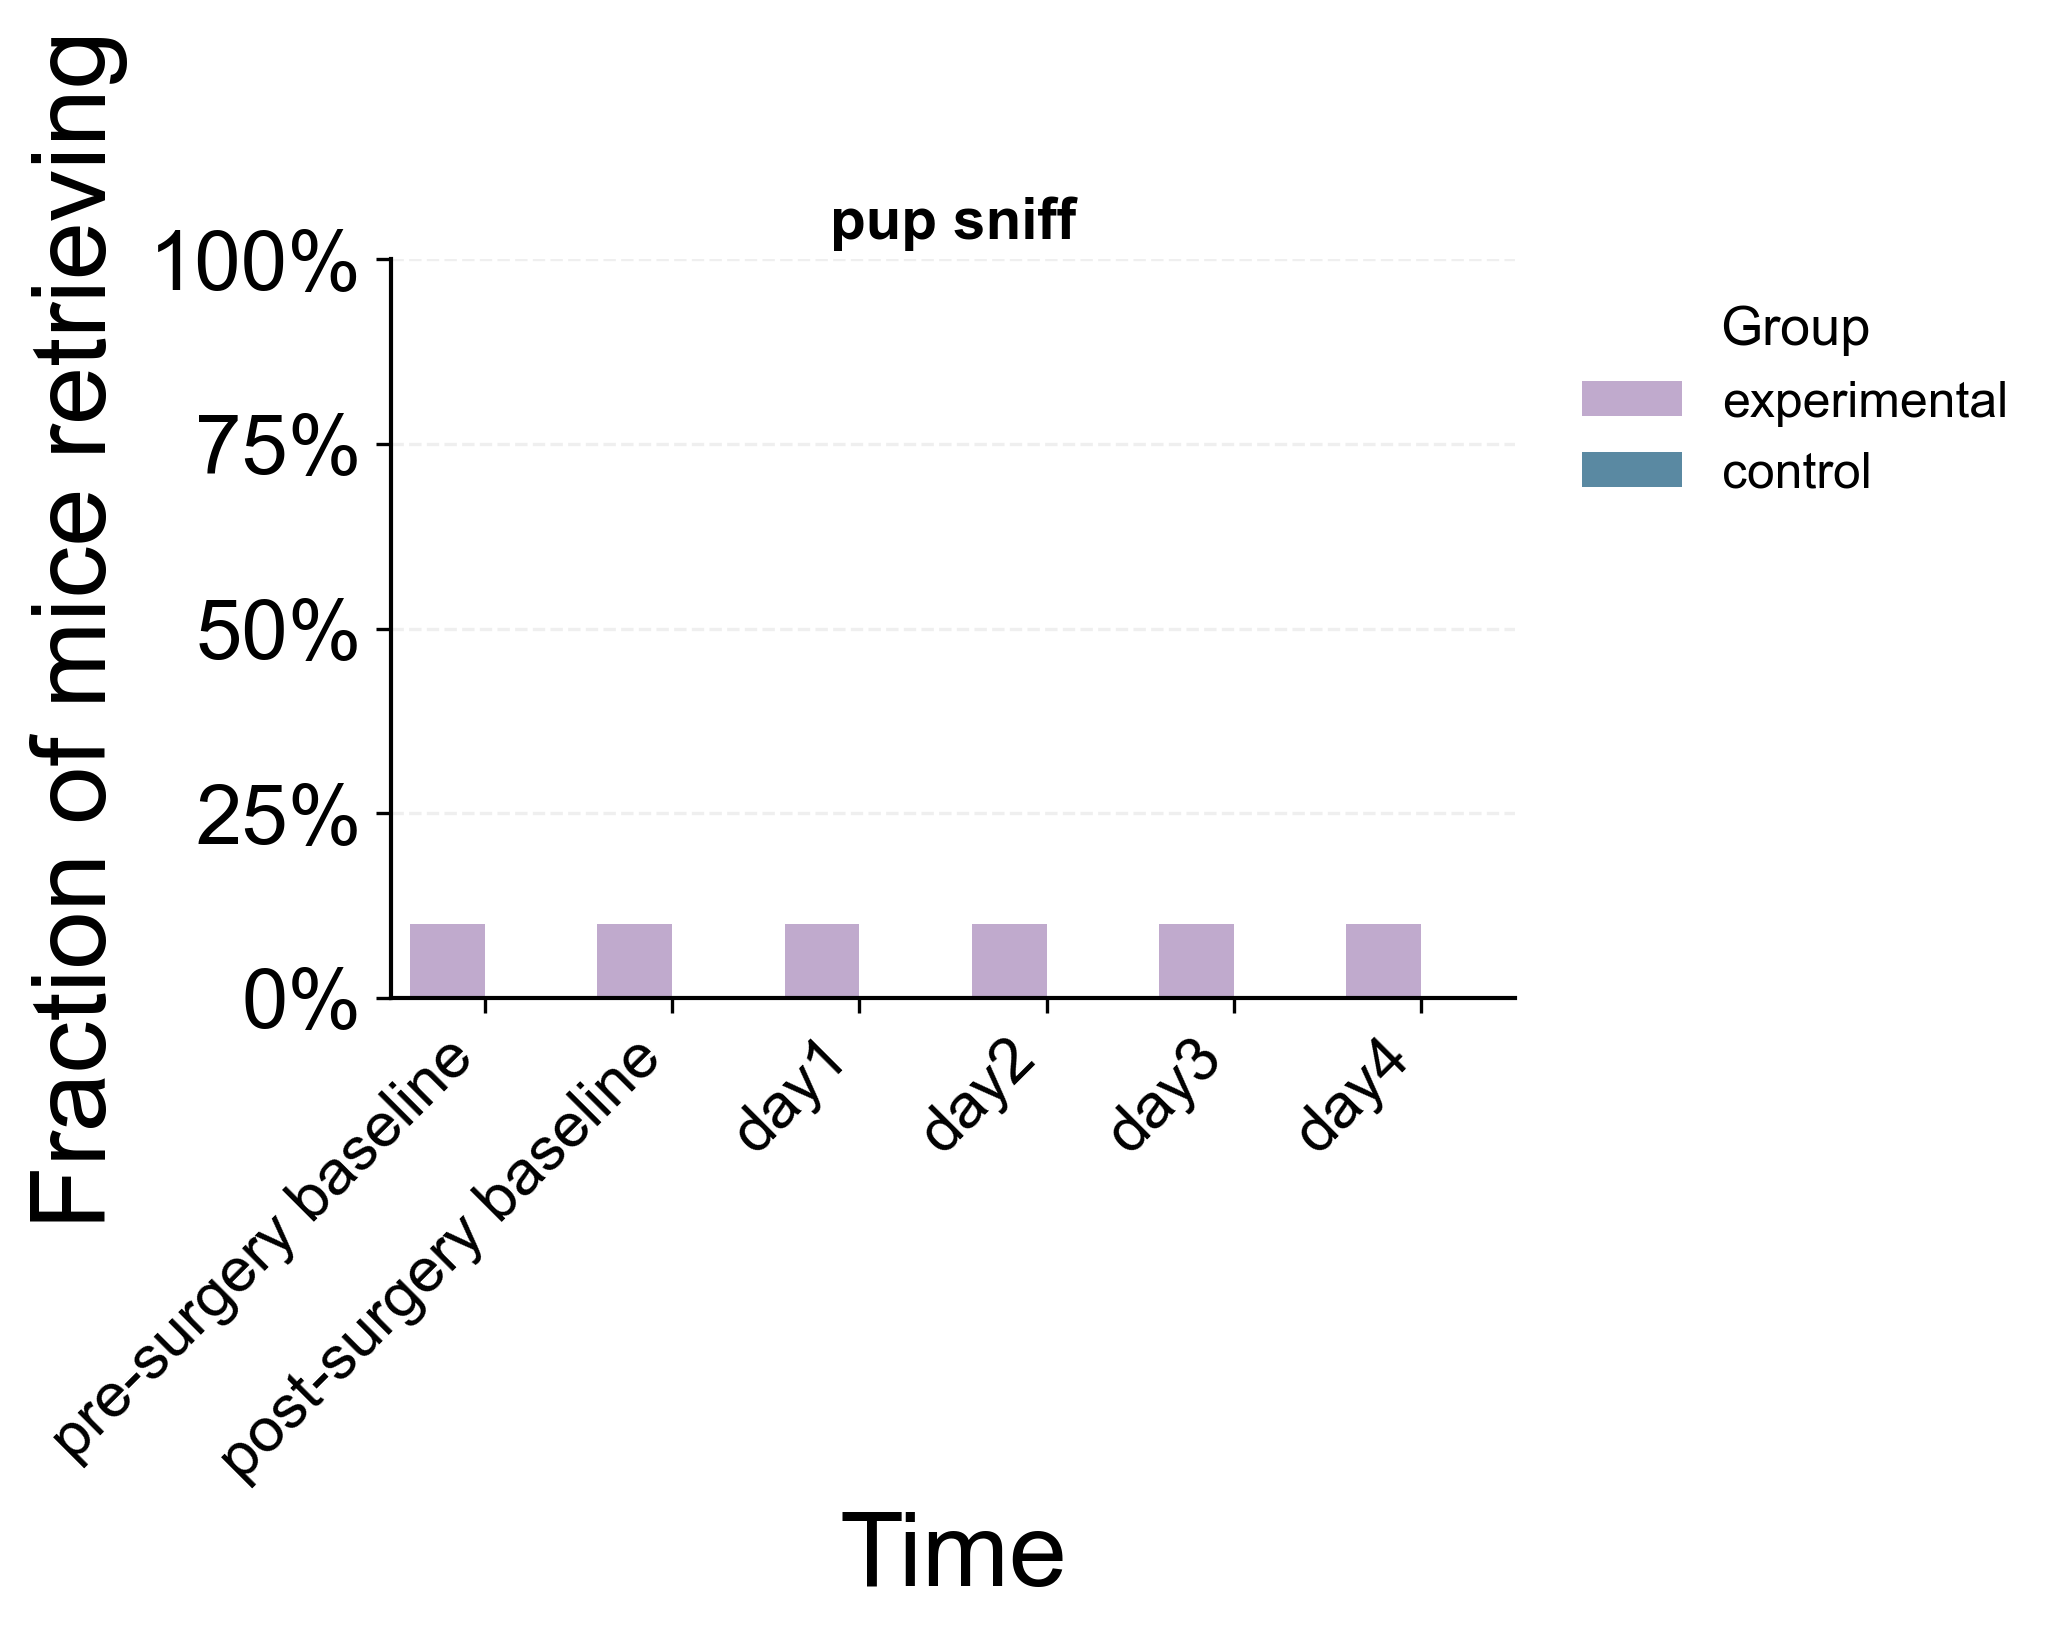

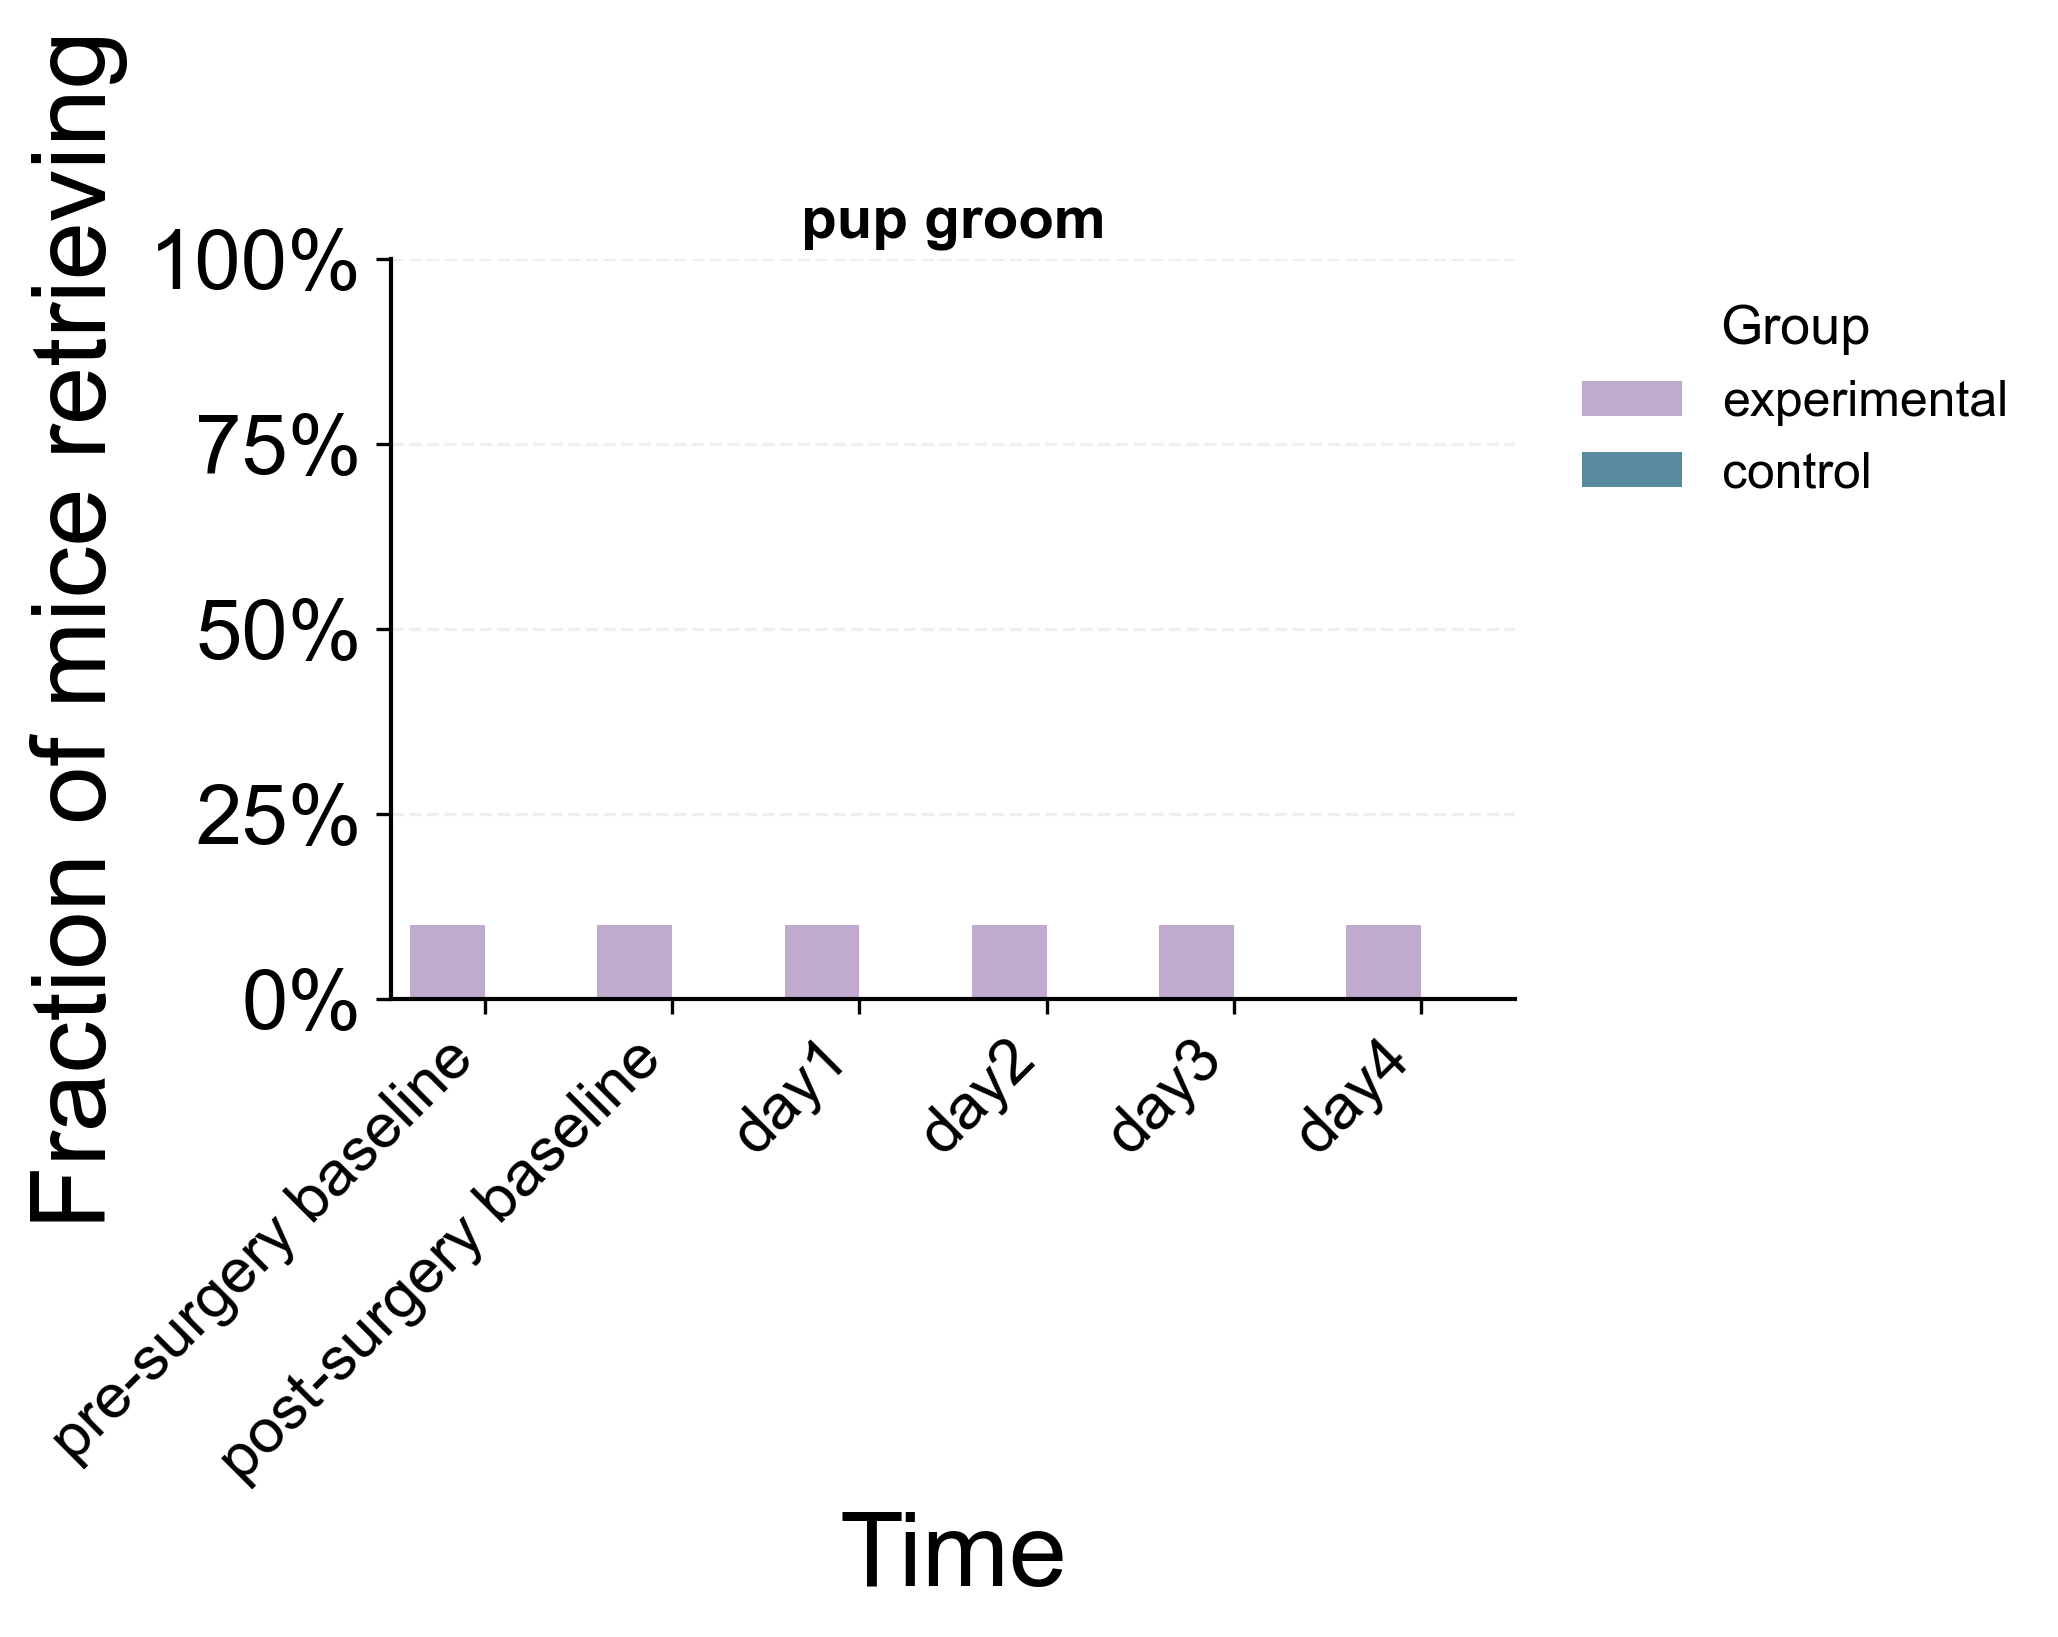

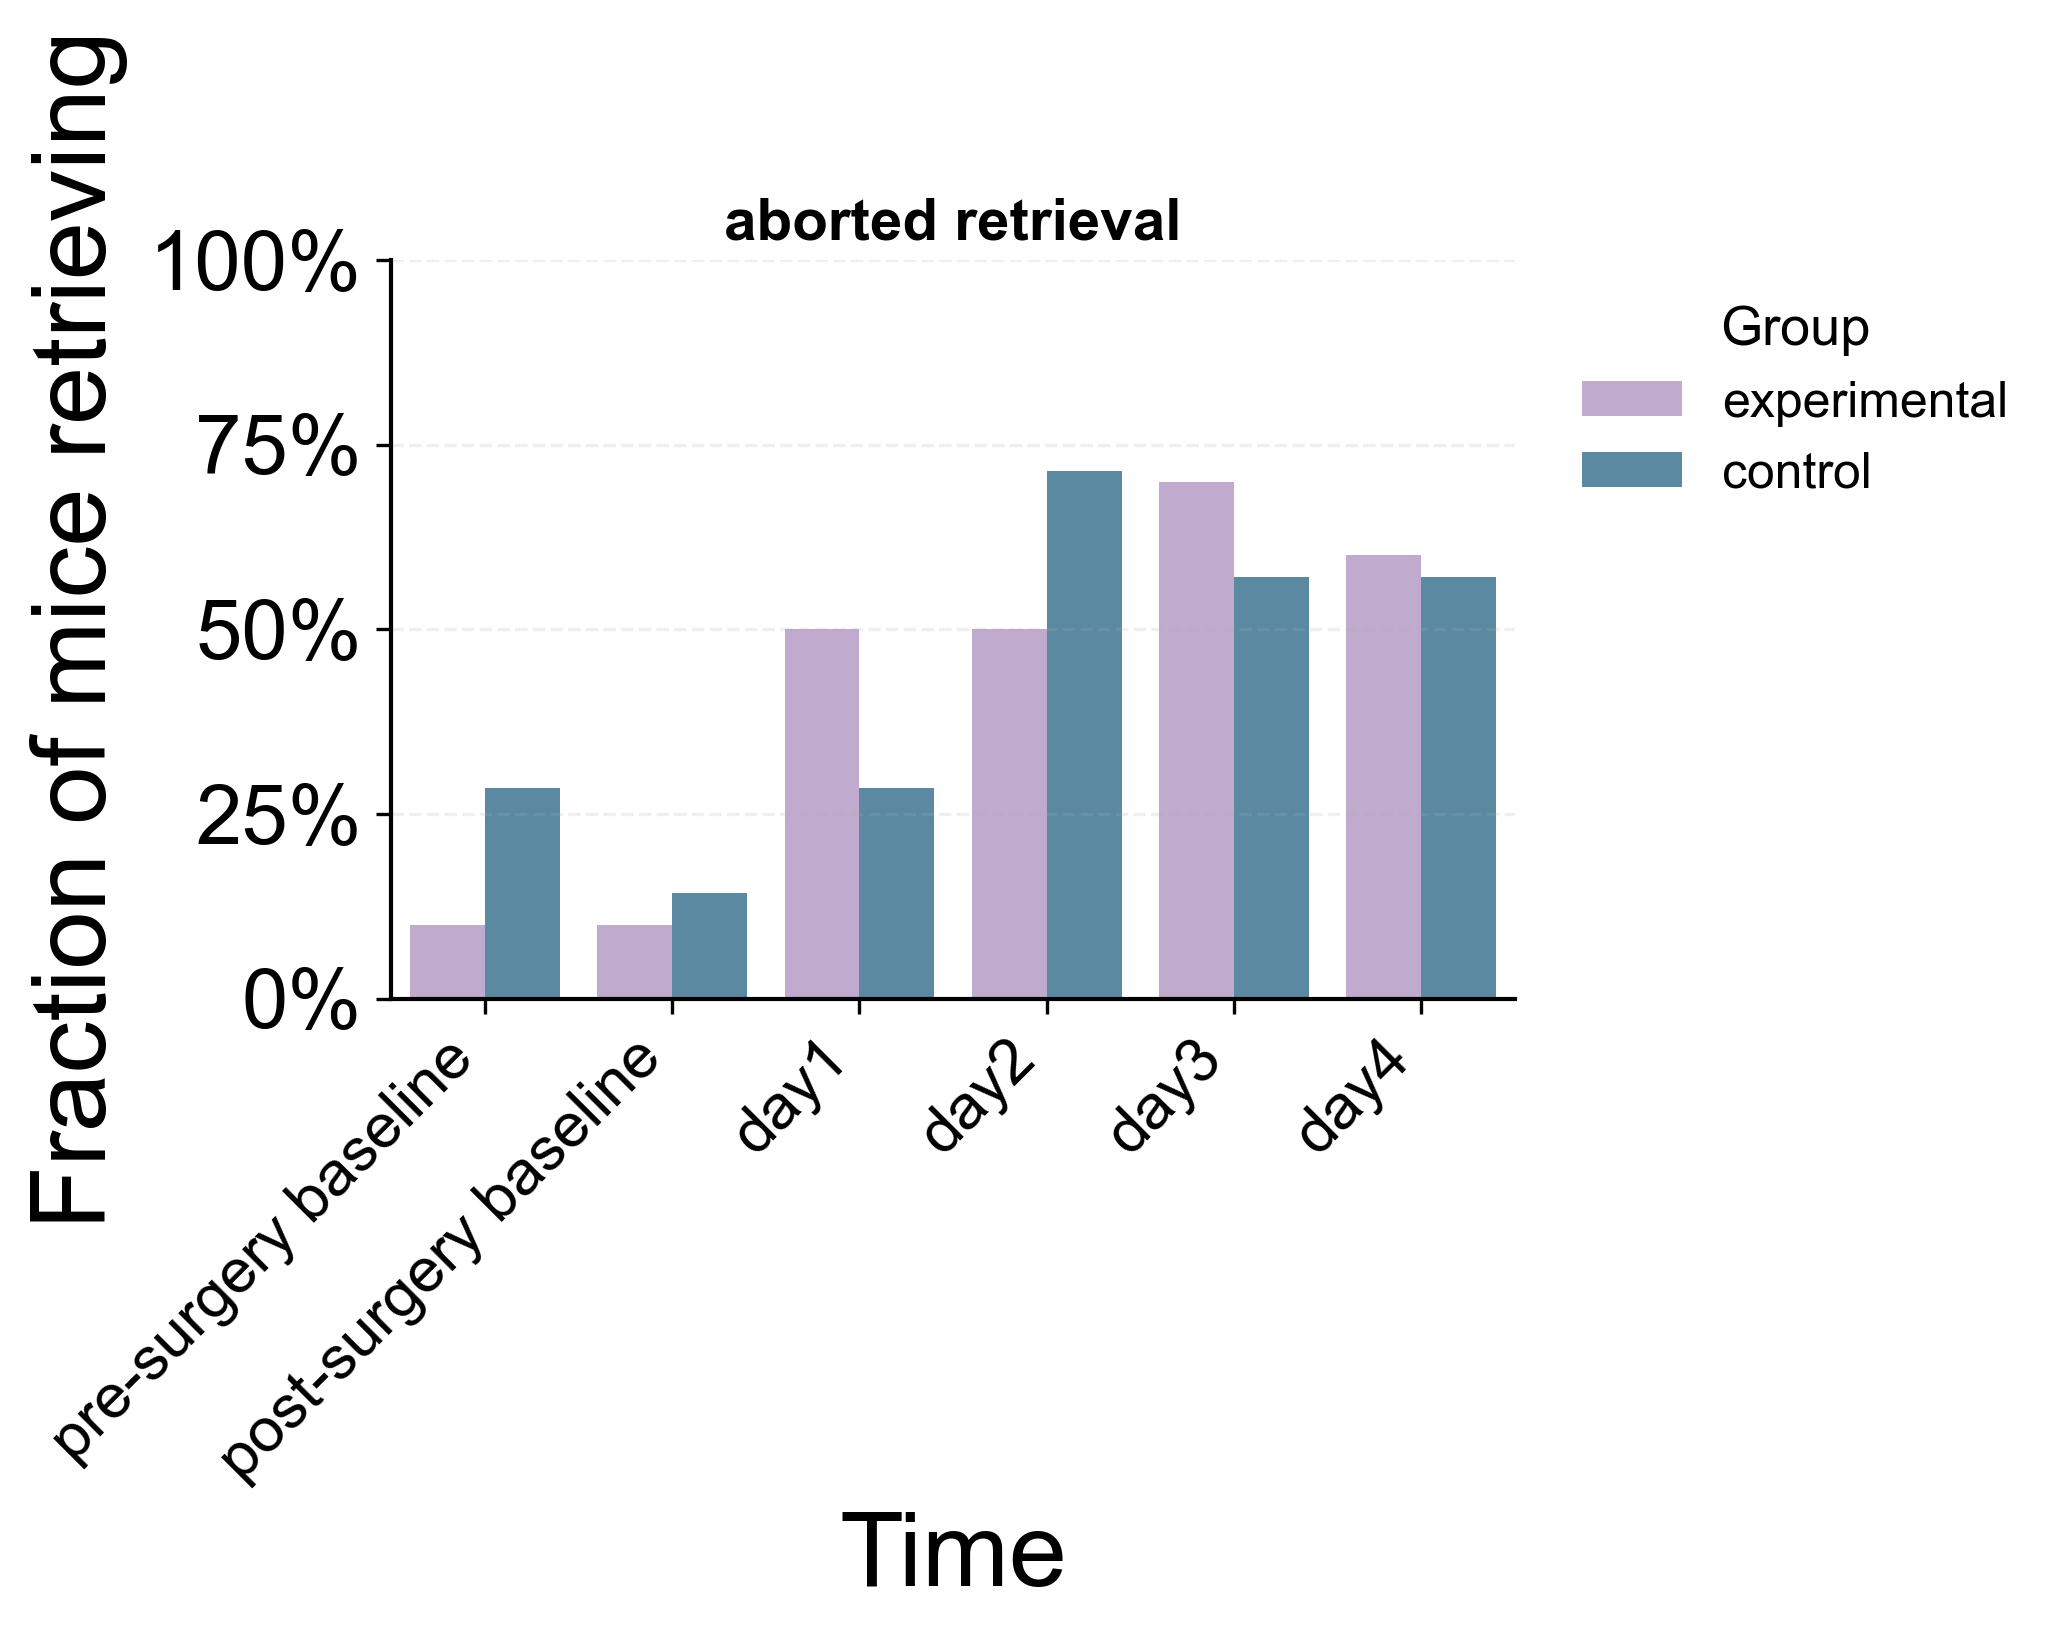

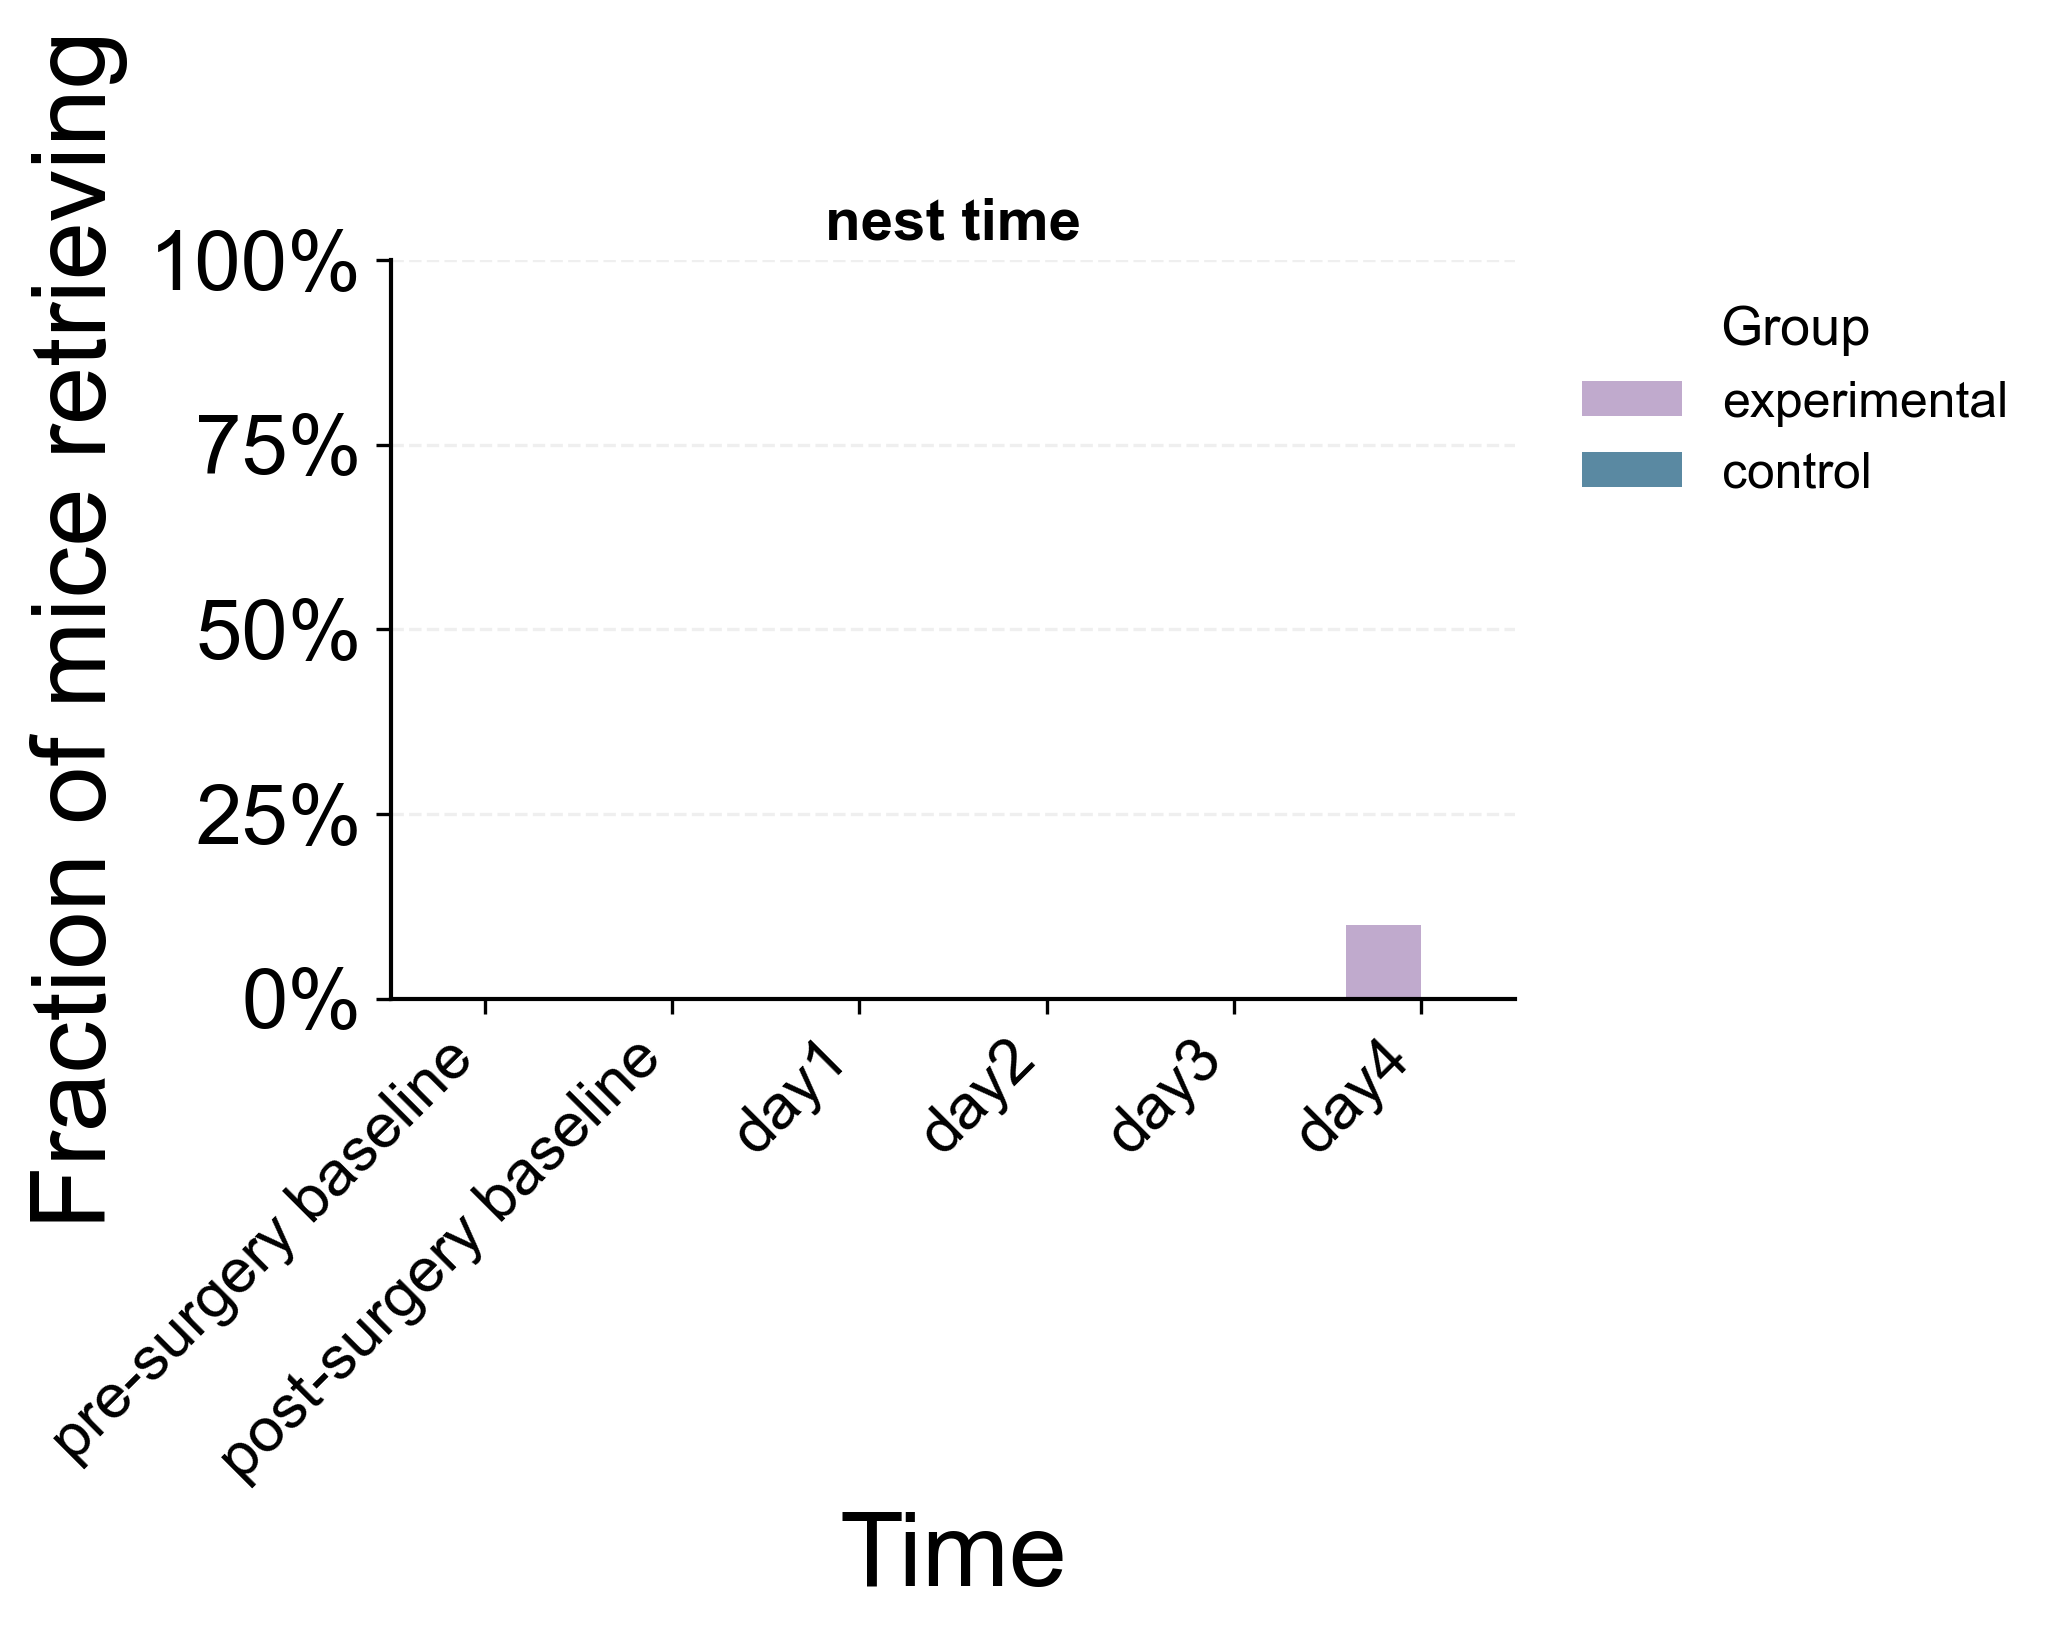

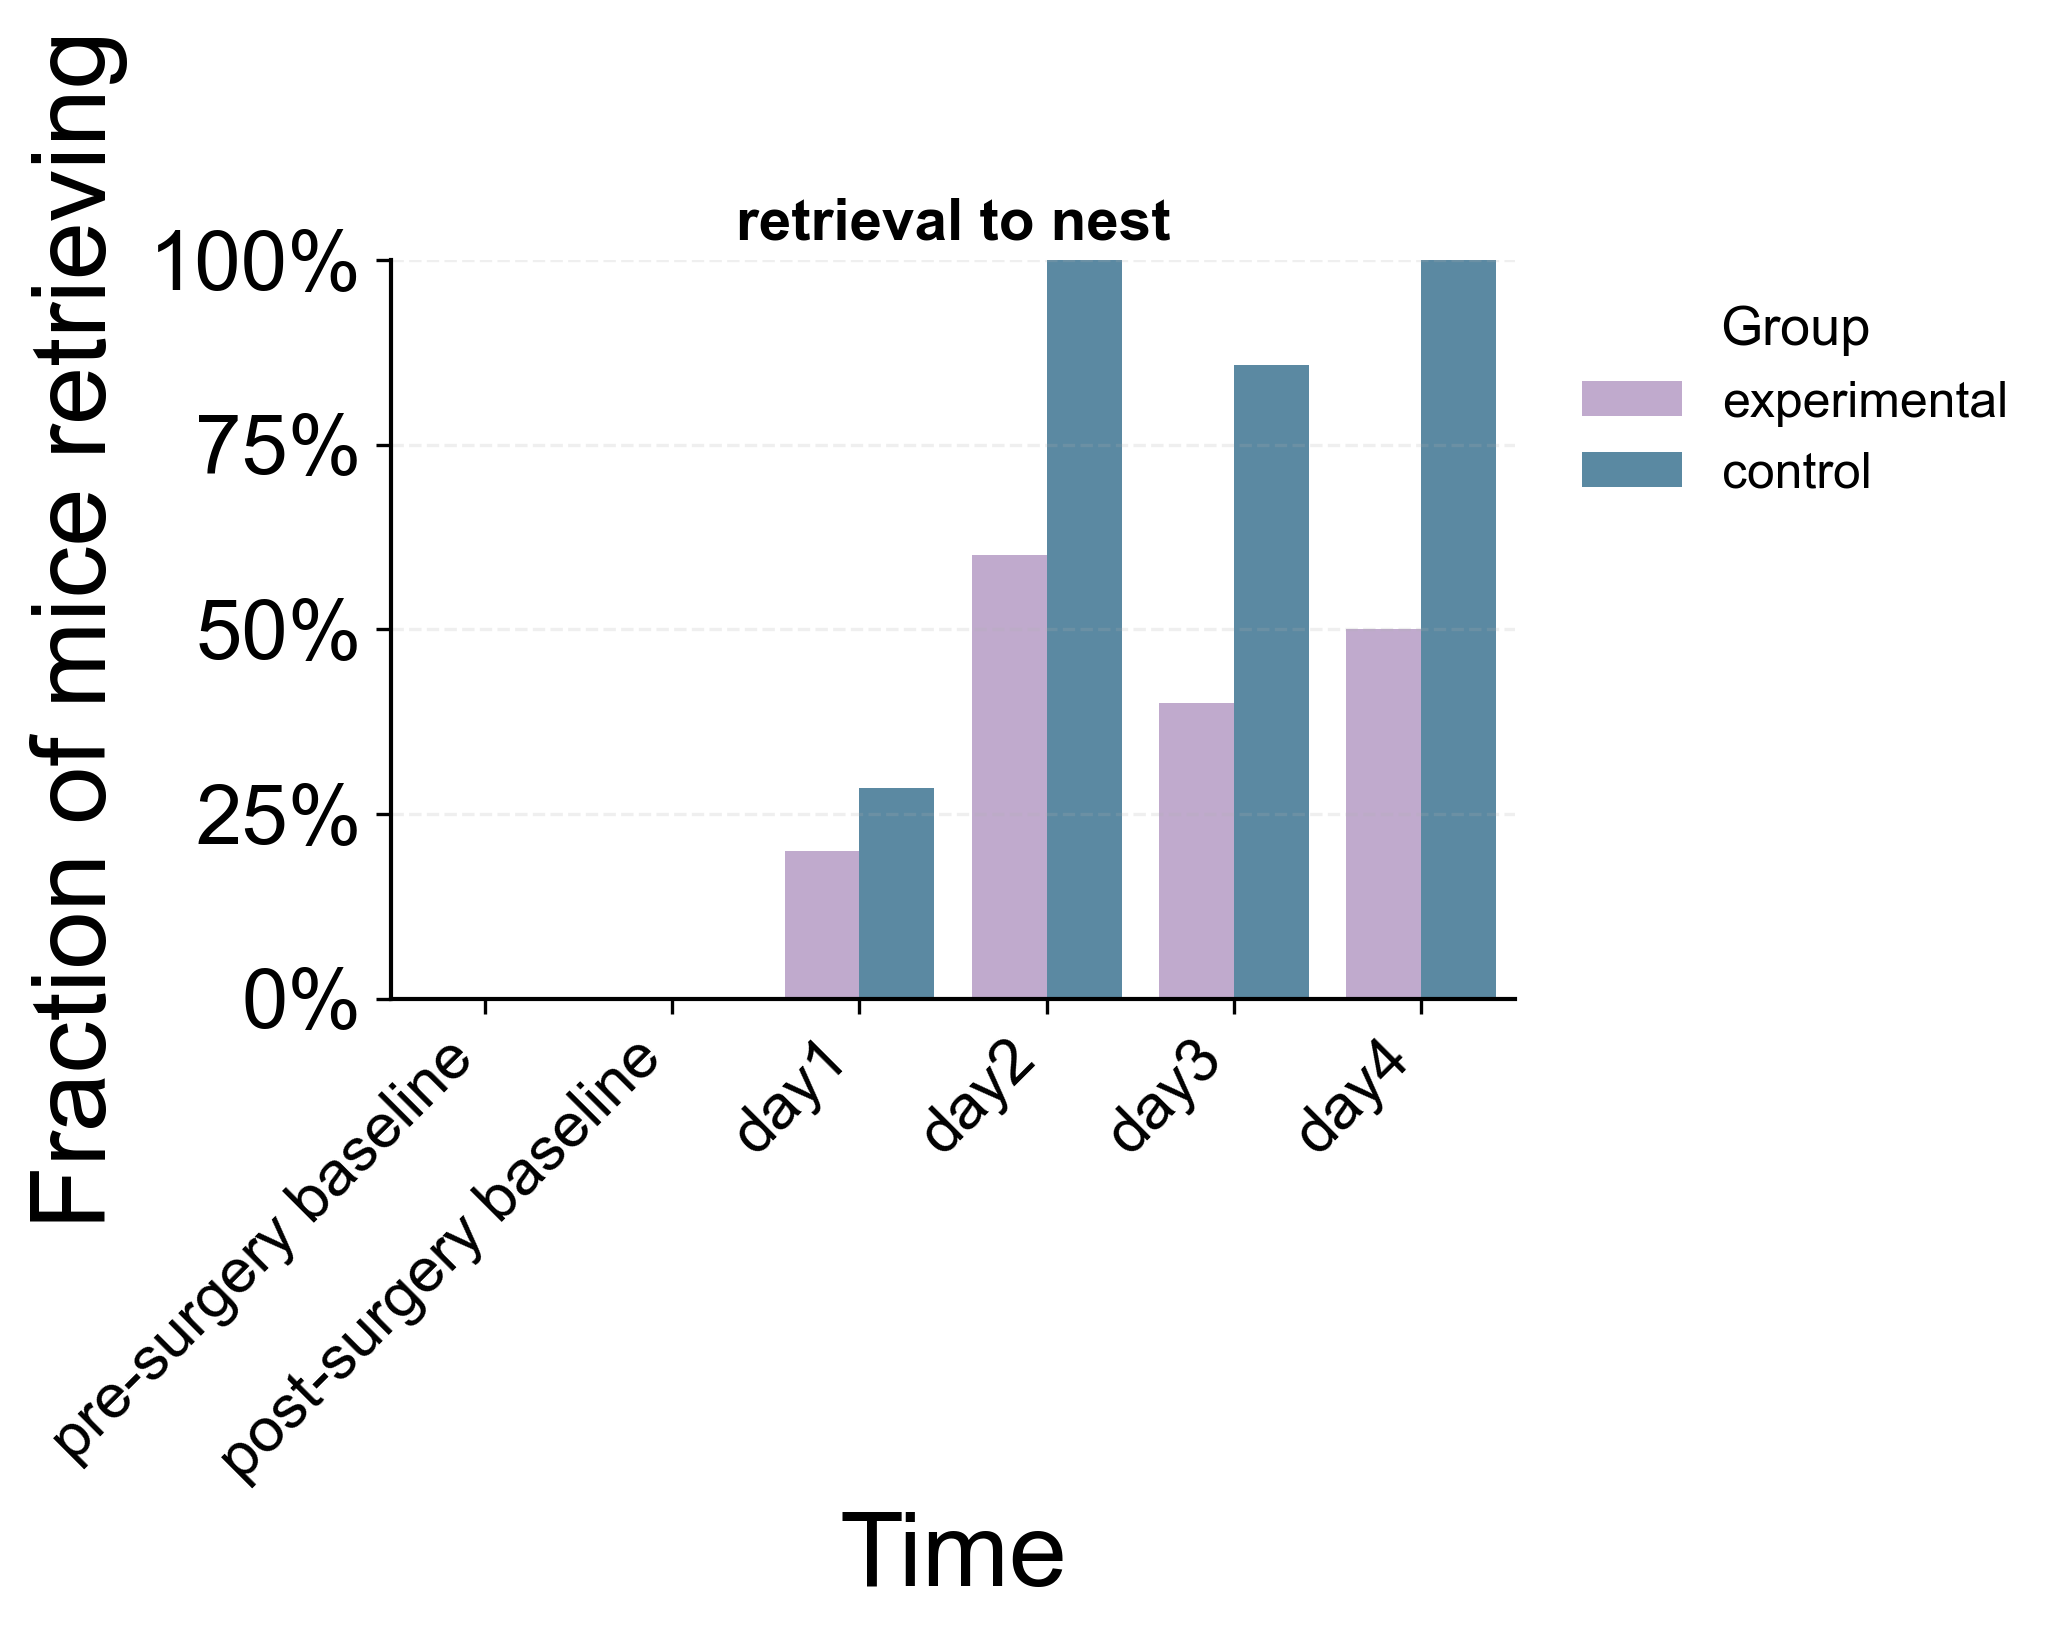

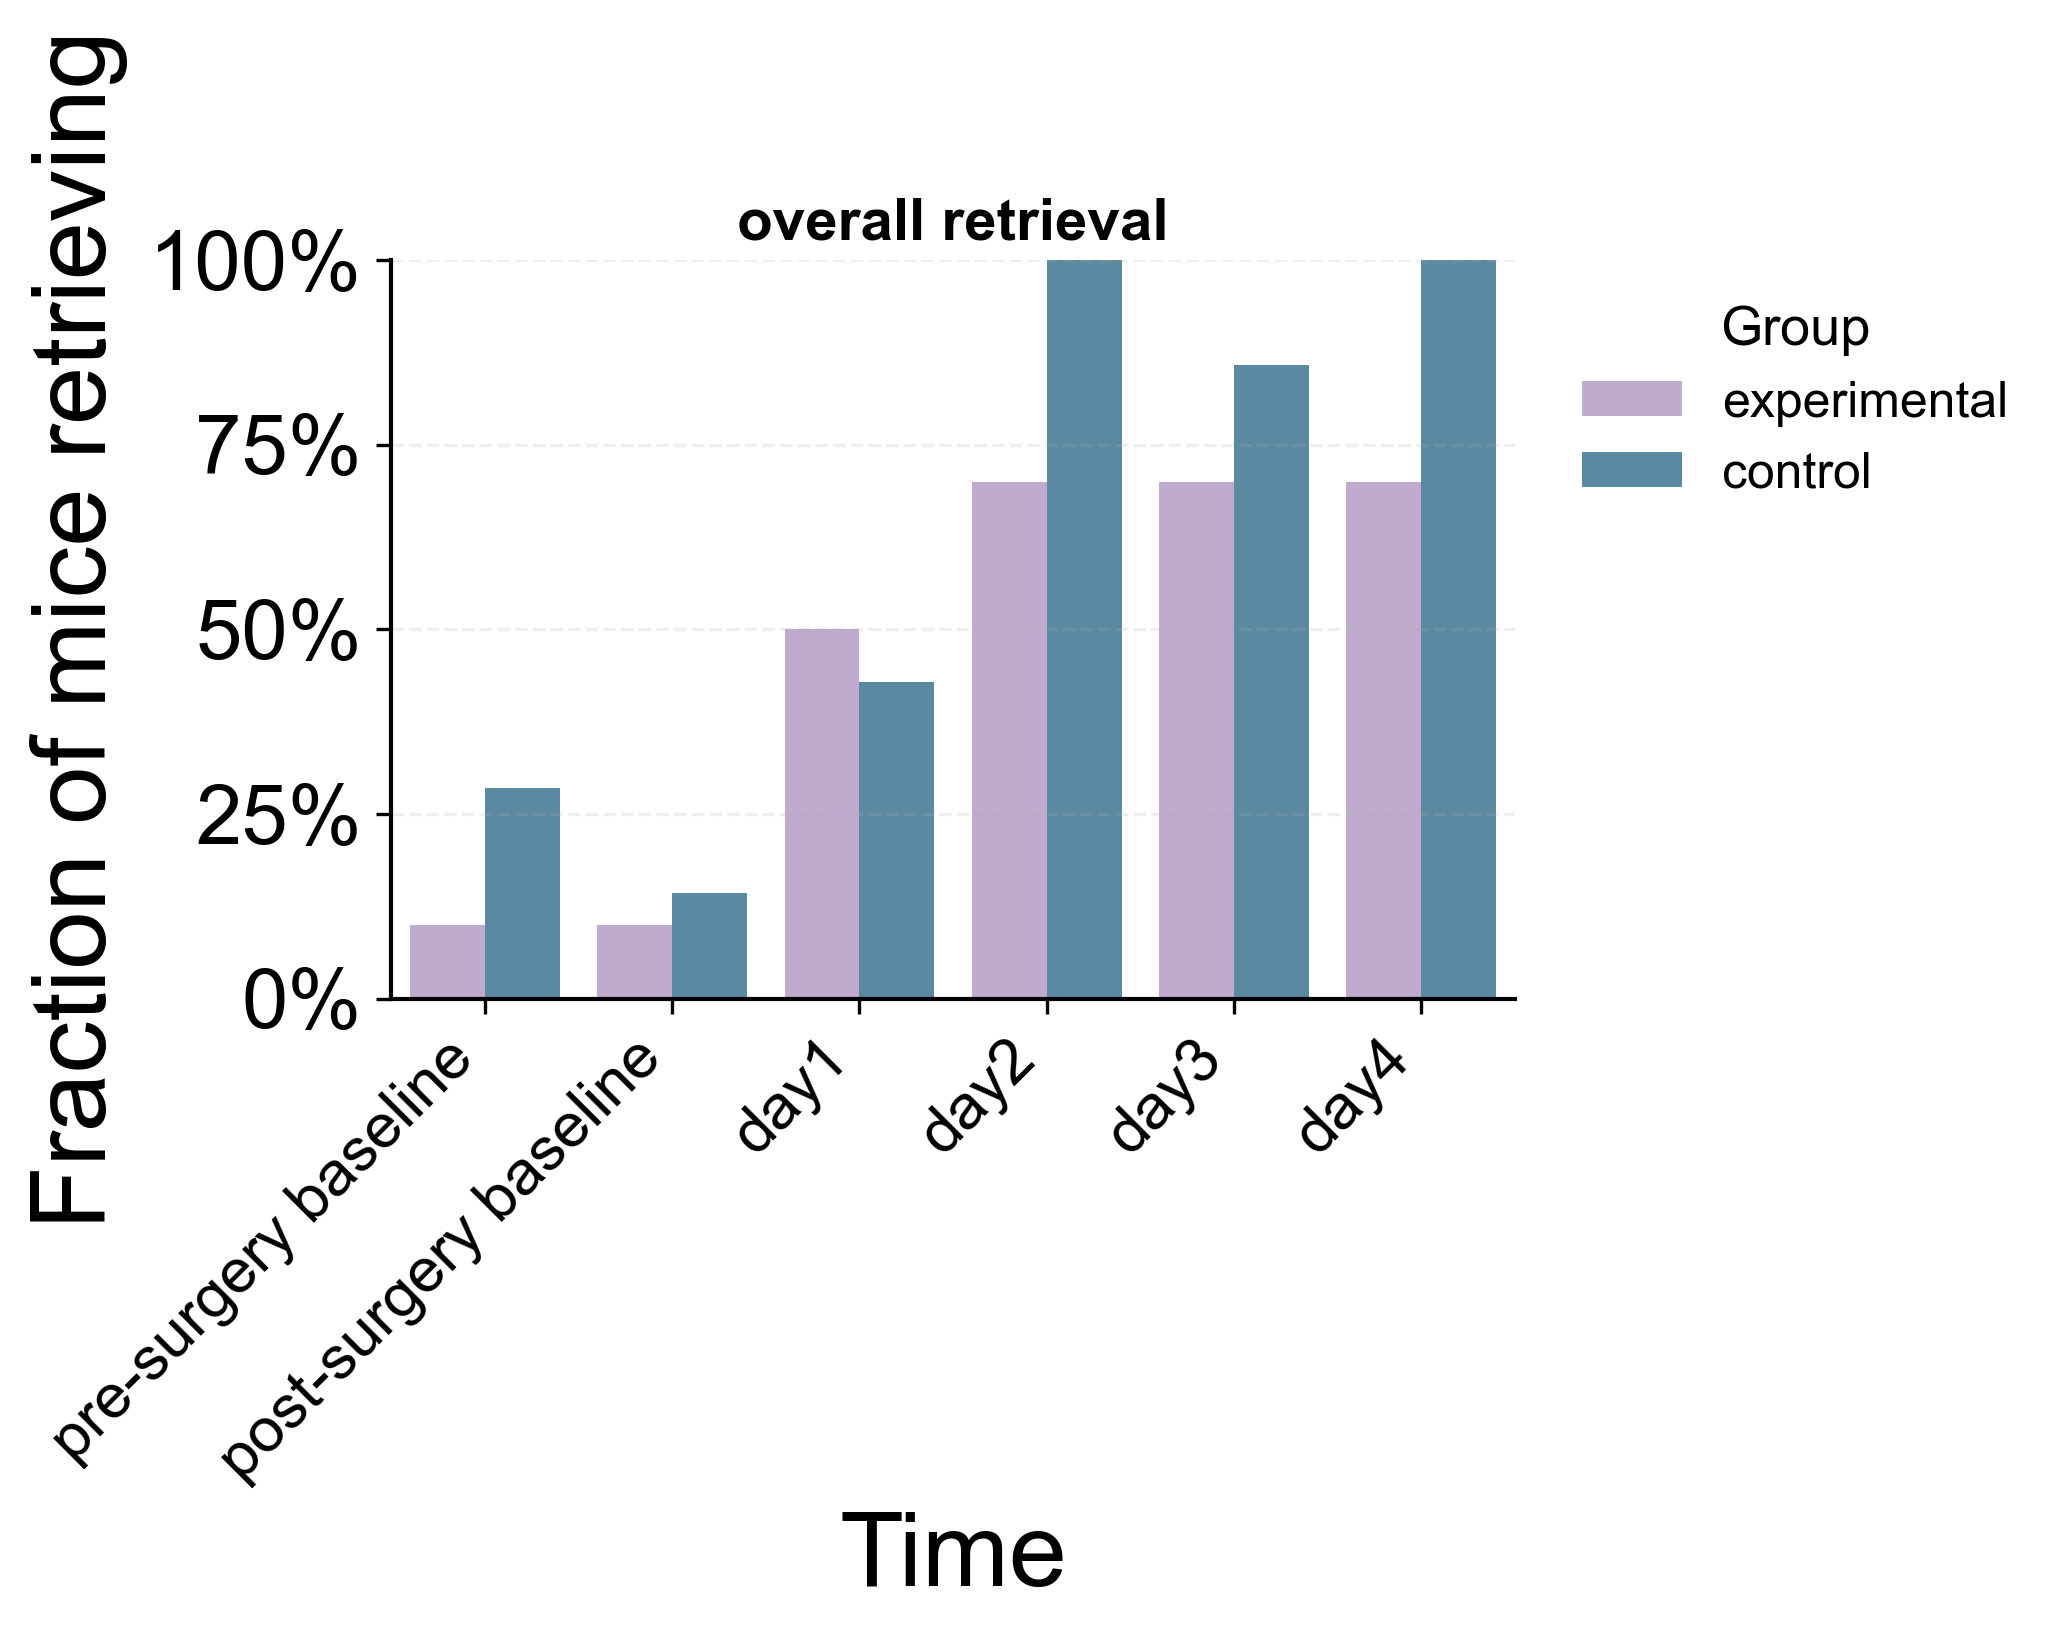

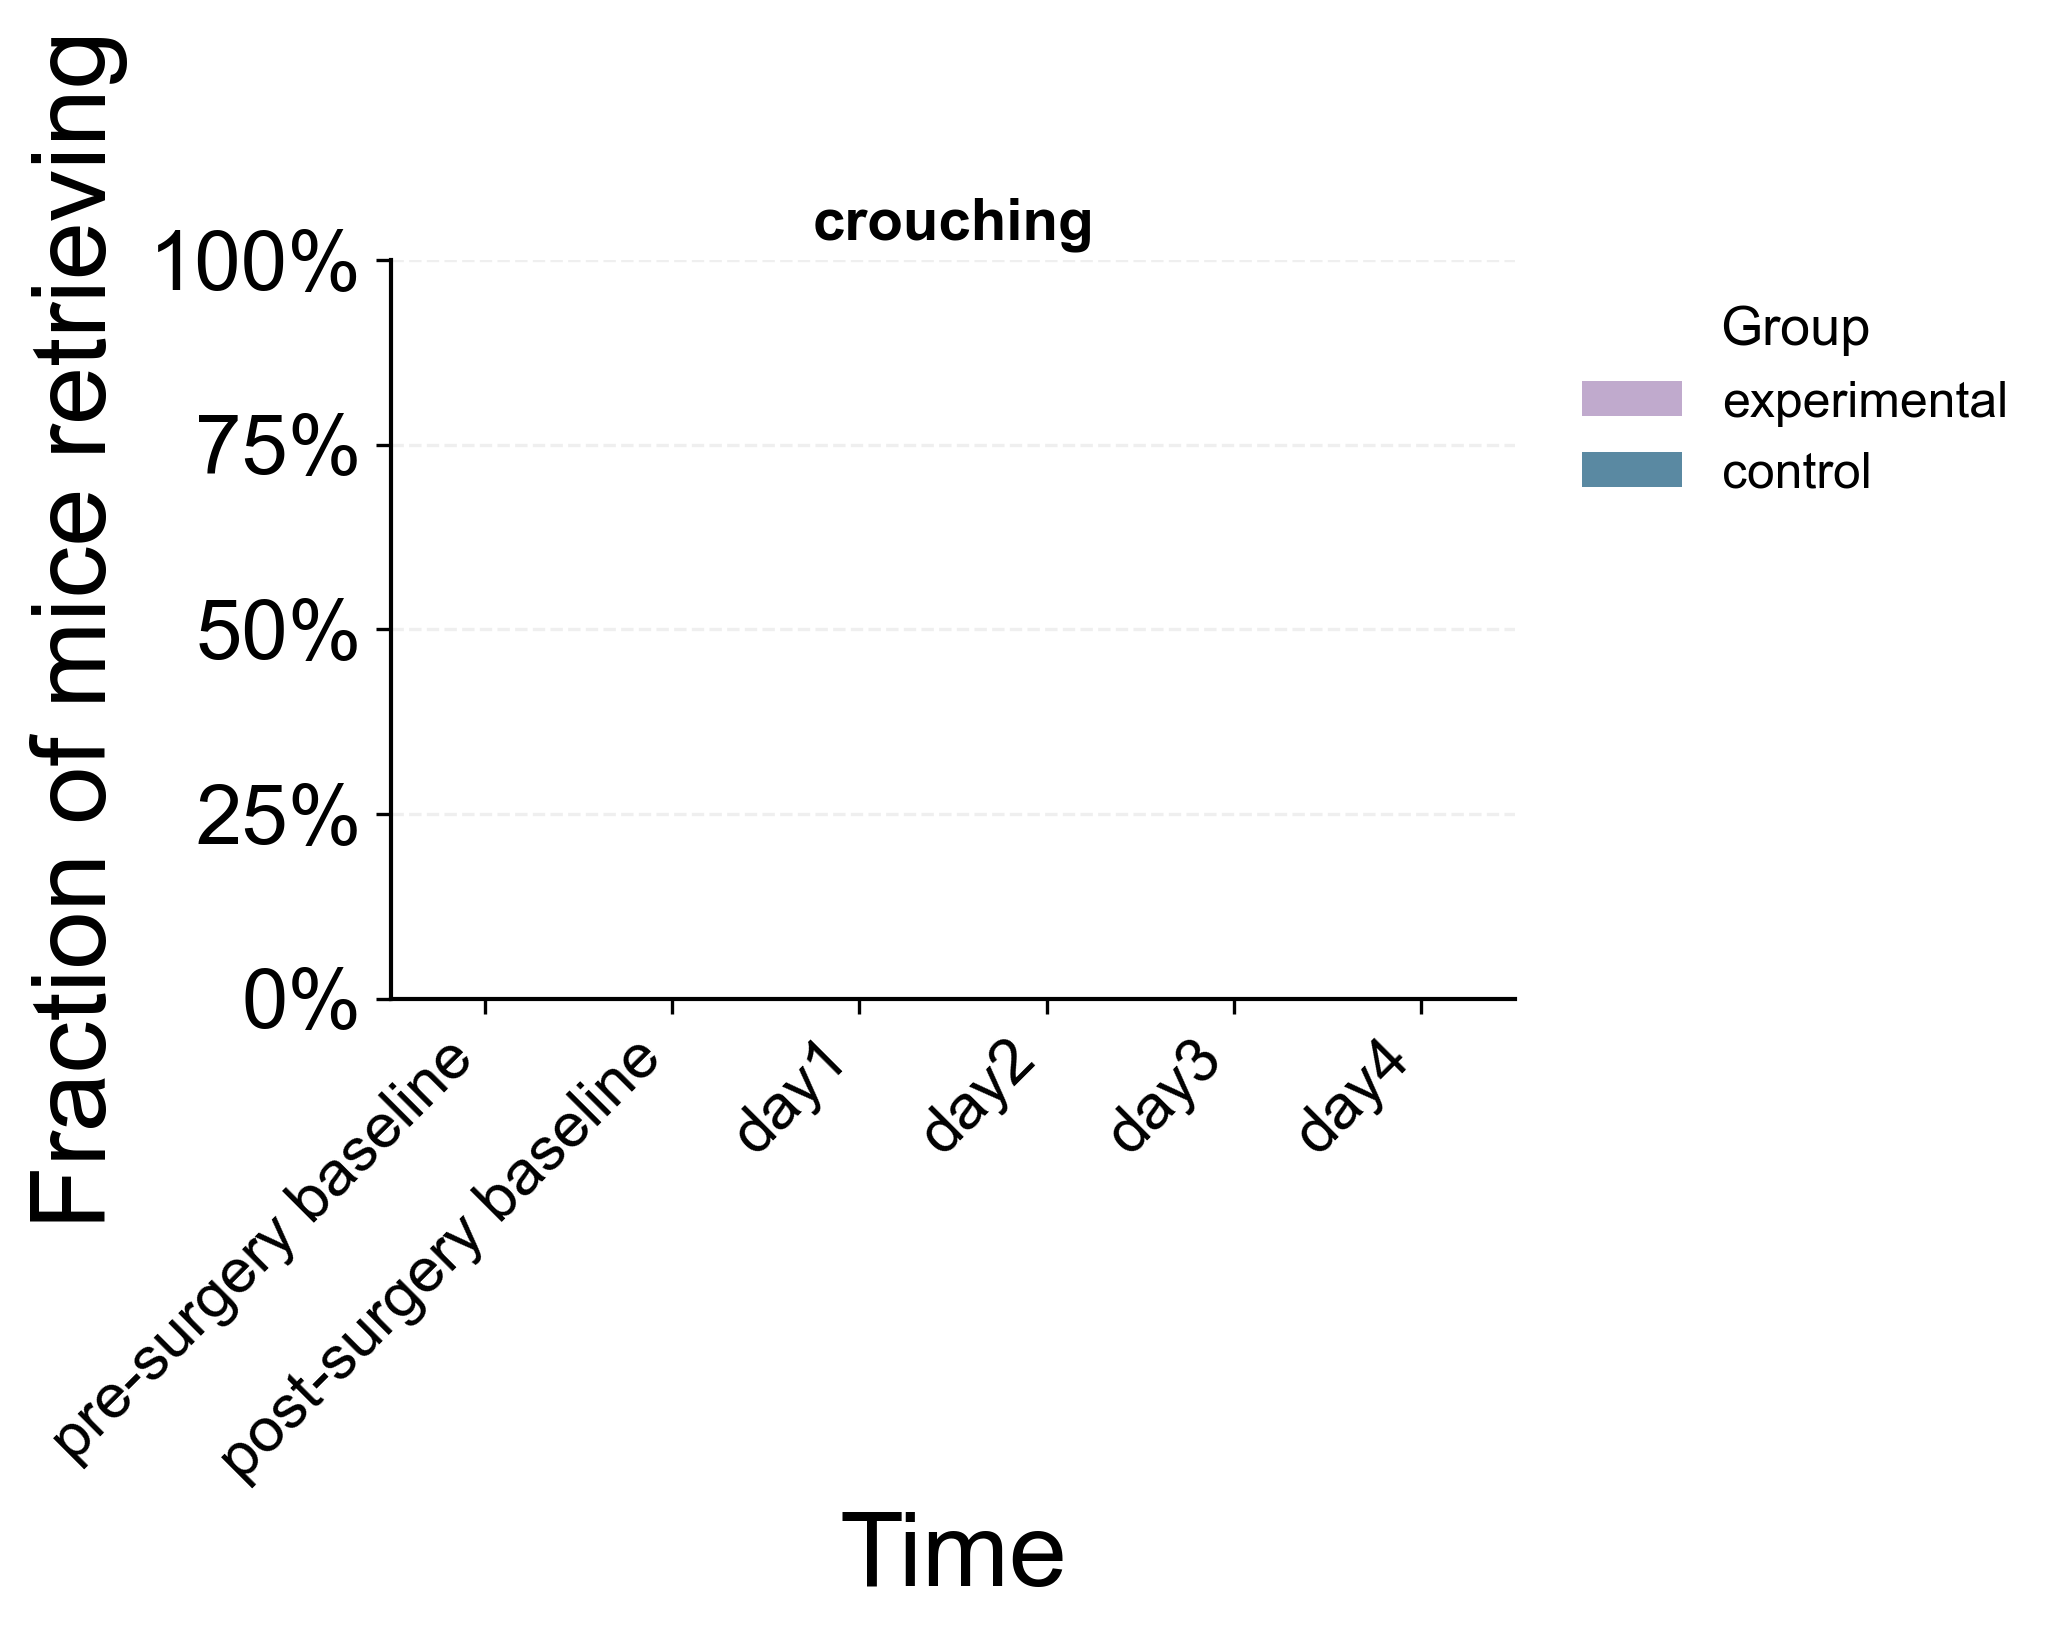

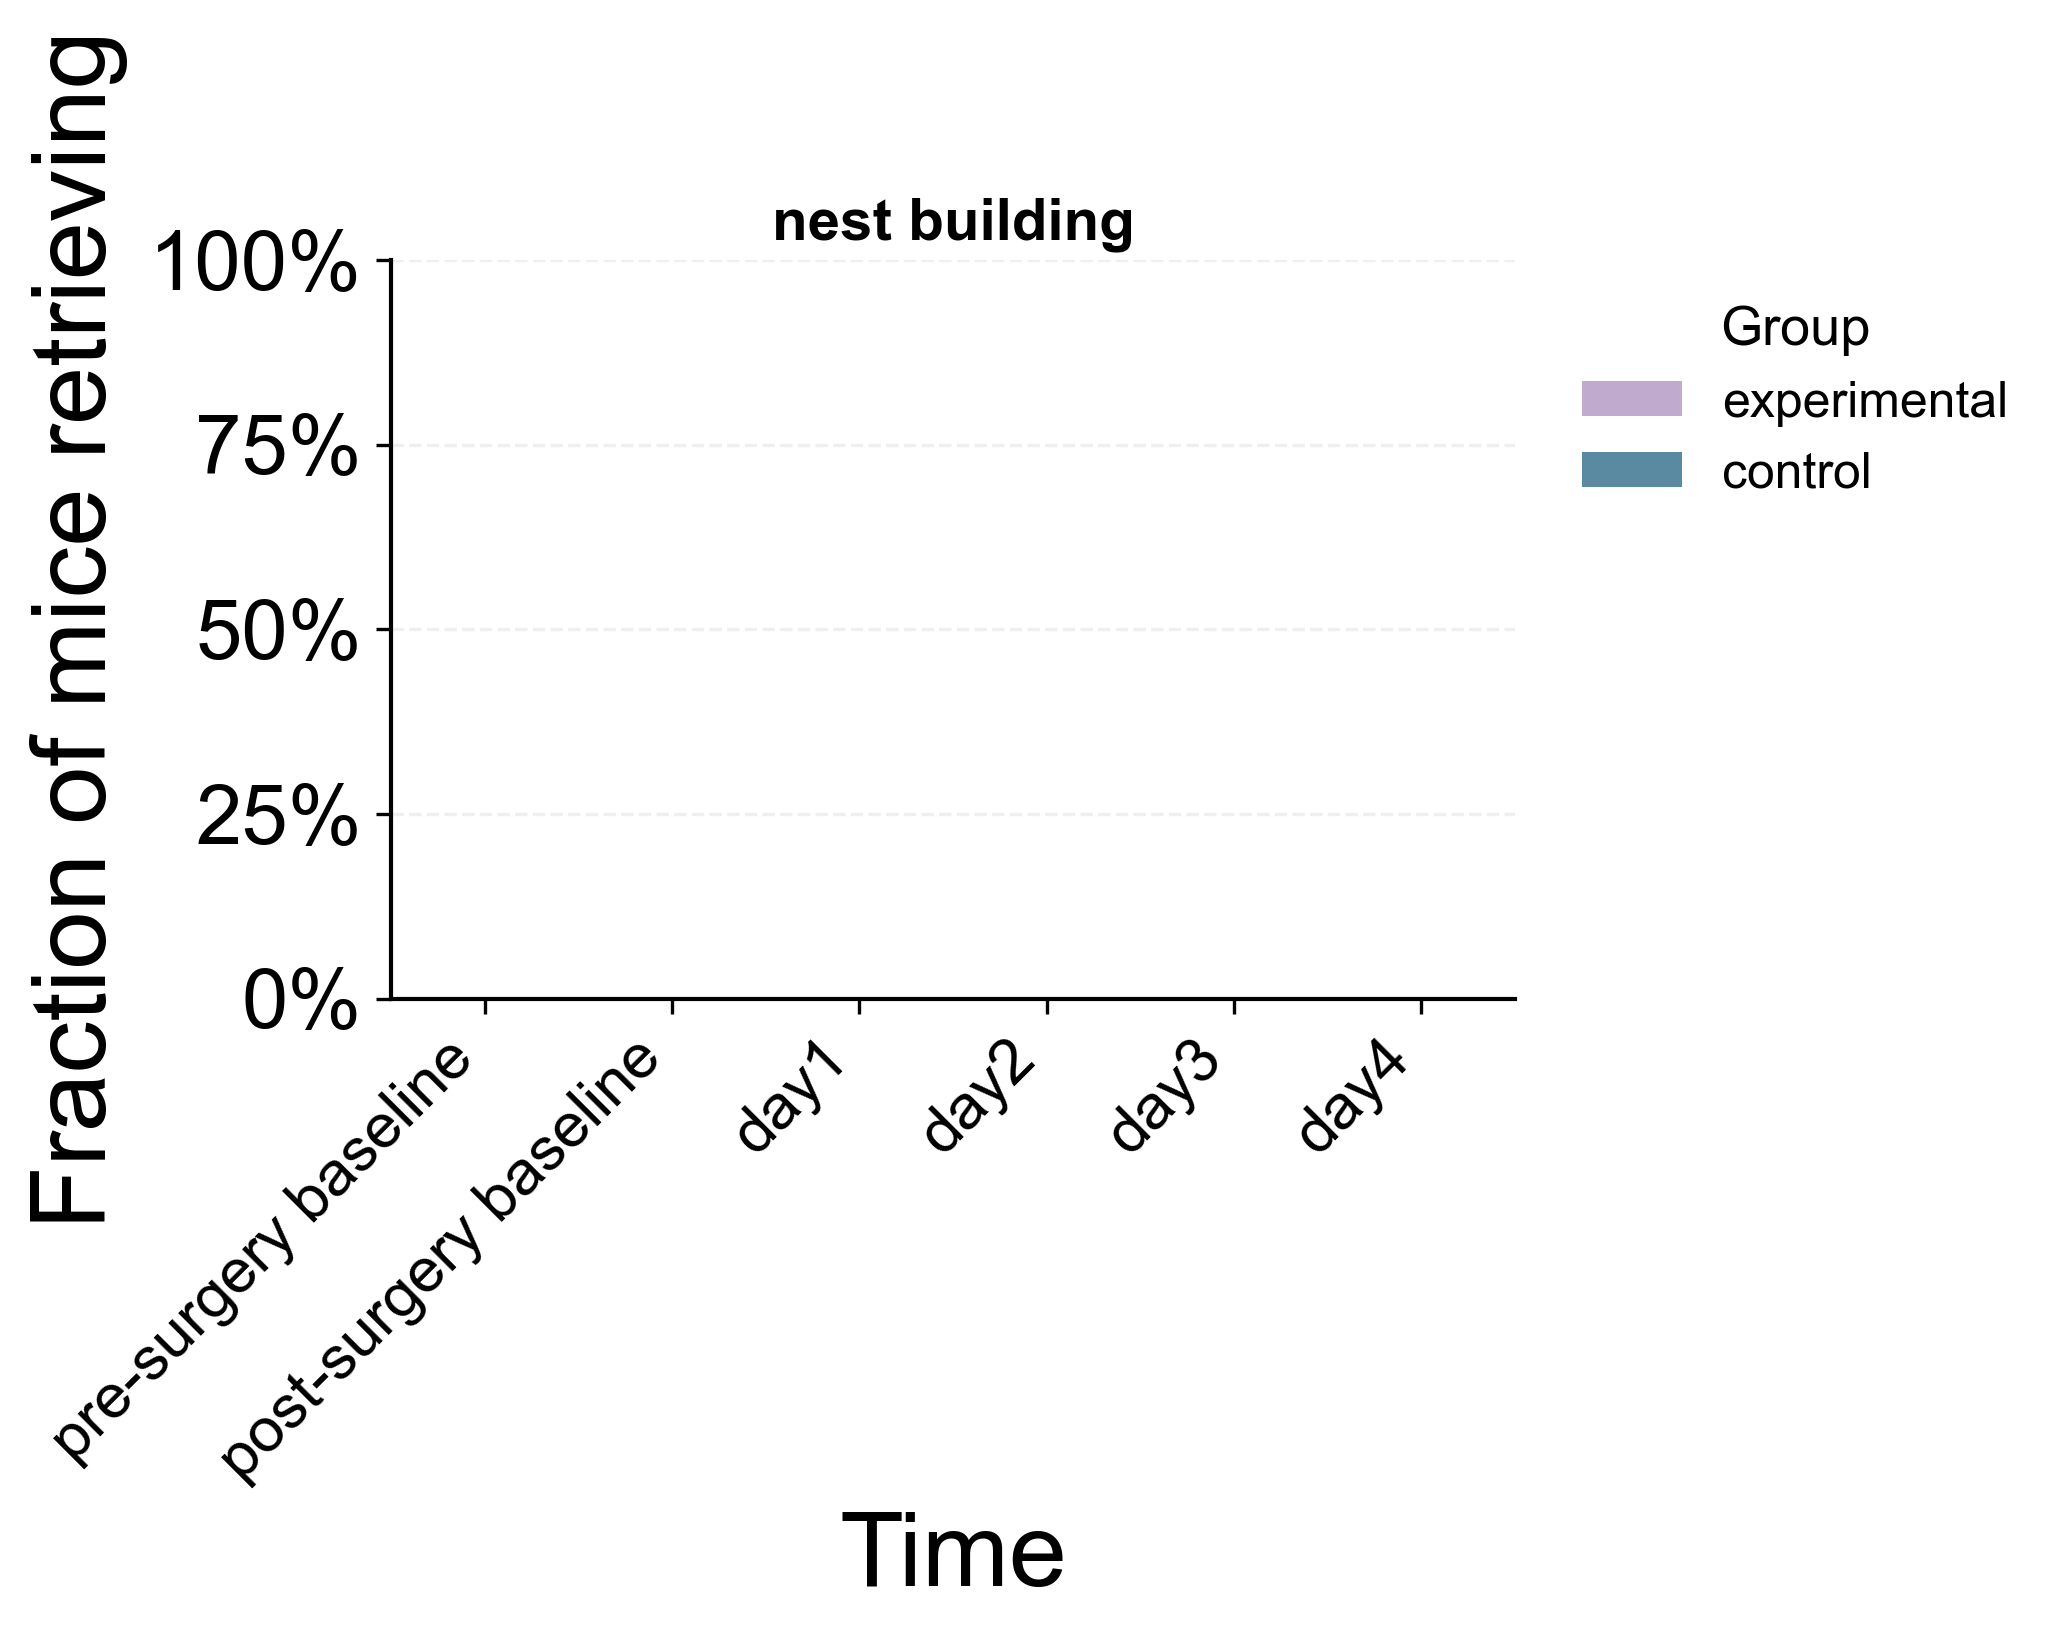

In [8]:
# Set publication-ready style parameters
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 10,  # Reduced font size for compact plots
    'axes.linewidth': 1,  # Thinner axes lines
    'axes.labelsize': 25,  # Smaller label size
    'axes.titlesize': 14,  # Smaller title size
    'xtick.labelsize': 15,  # Adjusted for longer labels
    'ytick.labelsize': 20,  # Smaller tick labels
    'figure.dpi': 300
})

for behaviour in percentages.behaviour.unique():
    perc_df = percentages[percentages.behaviour == behaviour]
    
    # Make a copy to avoid SettingWithCopyWarning
    perc_df = perc_df.copy()
    
    # Rename time points for clarity
    perc_df['time'] = perc_df['time'].replace({
        'baselinepre': 'pre-surgery baseline',
        'baselinepost': 'post-surgery baseline'
    })
    
    # Create figure with compact size
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Add a subtle grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.2)
    
    # Define custom palette for groups using xkcd colors
    group_palette = {
        "experimental": "#a87dc2",  # wisteria from xkcd
        "control": "#045c8c"        # muted blue from xkcd
    }
    
    # Create barplot with custom styling
    bar = sns.barplot(x="time", y="percentage", hue="group", data=perc_df,
                     palette=group_palette,
                     alpha=0.7,
                     linewidth=0.8)
    
    # Set y-axis limits and tick marks (0 to 1 for percentages)
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(['0%', '25%', '50%', '75%', '100%'])
    
    # Adjust labels for compact size
    plt.ylabel('Fraction of mice retrieving', labelpad=5)
    plt.xlabel('Time', labelpad=5)  # Empty xlabel
    
    # Add title with minimal spacing
    plt.title(behaviour, pad=5, fontweight='bold')
    
    # Rotate x-tick labels for better readability with long labels
    plt.xticks(rotation=45, ha='right')
    
    # Customize legend
    handles, labels = ax.get_legend_handles_labels()
    # Position legend outside plot area
    ax.legend(handles, labels, title="Group", loc='upper left', bbox_to_anchor=(1.02, 1), 
              frameon=False, fontsize=12, title_fontsize=13)
    
    # Remove unnecessary spines
    sns.despine()
    
    # Adjust figure size to accommodate legend
    fig.tight_layout()
    # Add extra space for the legend
    plt.subplots_adjust(right=0.85)
    
    # Save figures in publication-ready formats
    plt.savefig(f'plots_chem_mea/{behaviour}_percentage.png', dpi=500, bbox_inches='tight')
    
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


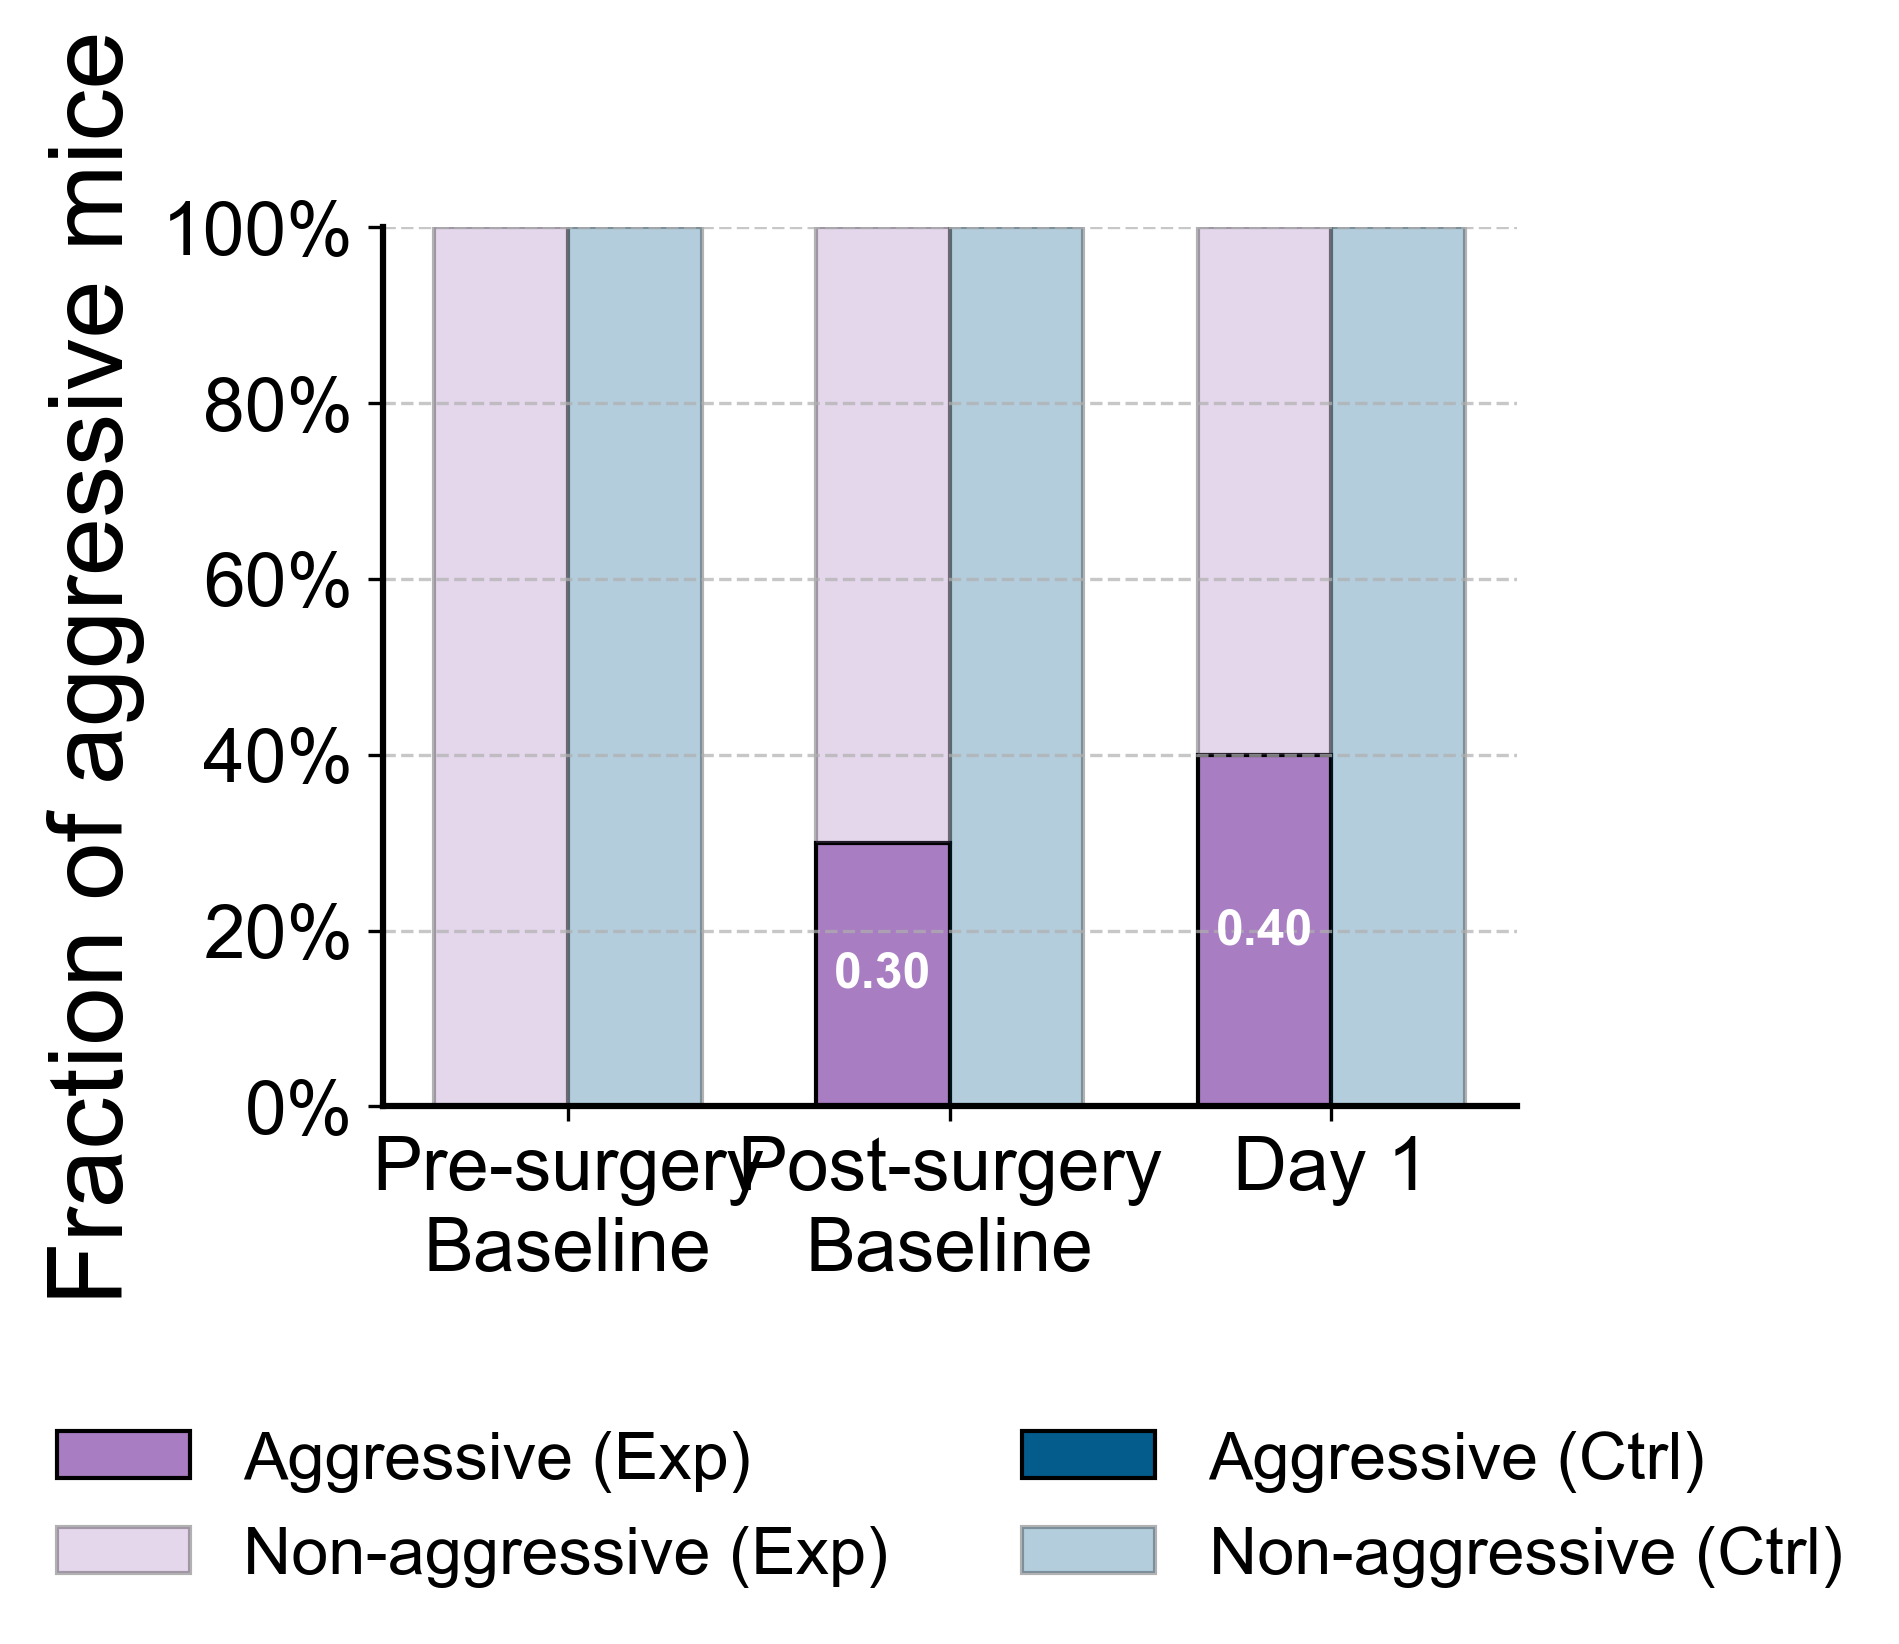

In [33]:

# IDs for all experimental and control mice
IDs = ['BRAC9595.2c', 'BRAC9284.3f', 'BRAC9284.3e', 'BRAC10307.5e', 'BRAC10520.3d', 
       'BRAC10466.3f', 'BRAC10307.5d', 'BRAC9562.6c', 'BRAC9788.3c', 'BRAC9843.3h']
IDs_ctrl = ['BRAC9562.6d', 'BRAC9788.3d', 'BRAC9562.6g', 'BRAC10364.3a', 
            'BRAC10410.3f', 'BRAC10410.3h', 'BRAC9911.7d']

# Mice that were aggressive at each timepoint
IDs_agg_base = ['BRAC9767.2d', 'BRAC10364.3b', 'BRAC10410.3g']
IDs_agg_day1 = ['BRAC9767.2d', 'BRAC10364.3b', 'BRAC10410.3g', 'BRAC9767.2a']

# Calculate proportions for experimental group
exp_total = len(IDs)
exp_agg_pre_prop = 0  # Assuming none were aggressive pre-surgery
exp_agg_base_prop = len(IDs_agg_base) / exp_total
exp_agg_day1_prop = len(IDs_agg_day1) / exp_total

# Calculate proportions for control group
ctrl_total = len(IDs_ctrl)
ctrl_agg_pre_prop = 0  # Assuming none were aggressive pre-surgery
ctrl_agg_base_prop = 0  # Assuming none were aggressive in control group
ctrl_agg_day1_prop = 0  # Assuming none were aggressive in control group

# Set up the plot with a professional style
plt.figure(figsize=(6, 4))
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.linewidth': 1.5,
})

# Data setup
times = ['Pre-surgery\nBaseline', 'Post-surgery\nBaseline', 'Day 1']
width = 0.35
x = np.arange(len(times))

# Create stacked bars for experimental group
exp_agg_props = [exp_agg_pre_prop, exp_agg_base_prop, exp_agg_day1_prop]
exp_non_agg_props = [1-p for p in exp_agg_props]

# Create stacked bars for control group
ctrl_agg_props = [ctrl_agg_pre_prop, ctrl_agg_base_prop, ctrl_agg_day1_prop]
ctrl_non_agg_props = [1-p for p in ctrl_agg_props]

# Plot bars - aggressive as bottom layer
plt.bar(x - width/2, exp_agg_props, width, label='Aggressive (Exp)', 
        color='#a87dc2', edgecolor='black', linewidth=1)
plt.bar(x - width/2, exp_non_agg_props, width, bottom=exp_agg_props, label='Non-aggressive (Exp)', 
        color='#a87dc2', alpha=0.3, edgecolor='black', linewidth=1)

# Control group
plt.bar(x + width/2, ctrl_agg_props, width, label='Aggressive (Ctrl)', 
        color='#045c8c', edgecolor='black', linewidth=1)
plt.bar(x + width/2, ctrl_non_agg_props, width, bottom=ctrl_agg_props, label='Non-aggressive (Ctrl)', 
        color='#045c8c', alpha=0.3, edgecolor='black', linewidth=1)

# Update value labels to appear on the non-aggressive portions if needed
for i in range(len(times)):
    # Experimental group
    if exp_agg_props[i] > 0.05:  # Only add text if there's enough space
        plt.text(i - width/2, exp_agg_props[i]/2, 
                f'{exp_agg_props[i]:.2f}', ha='center', va='center', 
                color='white', fontweight='bold')

# Customize plot
plt.ylabel('Fraction of aggressive mice', fontsize=25)
# plt.title('Proportion of Aggressive Mice', fontsize=20, fontweight='bold')
plt.xticks(x, times, fontsize=18)
plt.yticks(np.arange(0, 1.1, 0.2), [f'{int(i*100)}%' for i in np.arange(0, 1.1, 0.2)], fontsize=18)
plt.ylim(0, 1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2, frameon=False, fontsize=16)

# Add grid lines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make room for the legend

plt.savefig("plots_chem_mea/aggressive_mice_proportion.png", dpi=300, bbox_inches='tight')
plt.savefig("plots_chem_mea/aggressive_mice_proportion.eps", bbox_inches='tight')
plt.show()